**Sai Sudeep Vadlamudi**

**Sujith Thota**

**Lakshmi Naga Hrishitaa Dharmavarapu**

**Saad Riazuddin Mahmood**

**Muhammad Arham**


**Key Problem:**

How do insider trading activities impact overall market movements across 5-6 companies? Insider trading, including share transactions by executives and major shareholders, can signal shifts in market perception and stock prices. Understanding the broader impact of these trades on multiple companies is a critical challenge for investors and analysts.

**Objective:**
Develop a predictive model that combines insider trading data, macroeconomic indicators, and historical market data to forecast market reactions.

Insider trading activities, especially those involving executives and significant shareholders, often carry implicationsfor market trends and investor sentiment. This study on predicting market reactions to insider trading across multiple companies, integrating diverse data sources to enhance forecasting accuracy. We utilized SEC EDGAR Form 4 filings for insider transactions, historical stock data from Yahoo Finance, and macroeconomic indicators from Federal Reserve Economic Data (FRED) to construct a comprehensive predictive model. Our methodology combines regression and classification techniques to predict both the direction and magnitude of market changes following insider trades. The results demonstrate that insider transactions, when analyzed alongside market and economic factors, can effectively forecast short-term market reactions with significant accuracy. These findings contribute to the field of financial market prediction, offering a data-driven approach for investors and analysts to anticipate market behavior in response to insider trading events.

The following analysis is done on JP Morgan.th, etc…th, etc…

In [204]:
import pandas as pd

# Load the Excel file (replace 'sample_data.xlsx' with your actual file path)
df = pd.read_excel('C:/Users/Admin/Desktop/DS_project/Insider-Trading/JPMC/data/jpm insider.xlsx')

# Drop the last four columns by index
df = df.iloc[:, :-4]

# Display the cleaned data
print("Cleaned Data:")
display(df)

Cleaned Data:


X         Filing Date Trade Date Ticker         Insider Name  \
0    NaN 2024-06-20 16:35:02 2024-06-20    JPM      Friedman Stacey   
1    NaN 2024-06-10 17:04:36 2024-06-10    JPM         Bacon Ashley   
2    NaN 2024-05-20 17:19:16 2024-05-20    JPM          Beer Lori A   
3    NaN 2024-05-20 17:14:46 2024-05-20    JPM      Friedman Stacey   
4    NaN 2024-05-14 16:43:43 2024-05-14    JPM        Lake Marianne   
..   ...                 ...        ...    ...                  ...   
356    D 2004-01-26 17:16:31 2004-01-23    JPM    McDavid William H   
357    D 2003-11-14 13:20:13 2003-11-13    JPM       Staley James E   
358  NaN 2003-11-10 11:14:59 2003-11-06    JPM  McCree Donald H III   
359  NaN 2003-10-28 15:12:08 2003-10-27    JPM     Schmidlin John W   
360  NaN 2003-07-28 16:16:15 2003-07-25    JPM        Pote Harold W   

                  Title   Trade Type    Price    Qty   Owned  ΔOwn  \
0                    GC     S - Sale  $197.58  -4415  102843   -4%   
1    Chief Risk Officer     S - Sale  $199.54  -5086  212265   -2%   
2                   CIO     S - Sale  $200.64  -5298   46375  -10%   
3                    GC     S - Sale  $200.65  -4415  107258   -4%   
4               CEO CCB     S - Sale  $200.02 -11734  221031   -5%   
..                  ...          ...      ...    ...     ...   ...   
356                  GC  S - Sale+OE   $39.94 -27859  562135   -5%   
357                  MD  S - Sale+OE   $35.84 -13810  225462   -6%   
358                  MD     S - Sale   $36.32 -14170  223635   -6%   
359                  MD     S - Sale   $35.22  -8000  249152   -3%   
360                 EVP     S - Sale   $34.63 -35000  283204  -11%   

           Value  
0      -$872,311  
1    -$1,014,857  
2    -$1,062,989  
3      -$885,862  
4    -$2,347,065  
..           ...  
356  -$1,112,688  
357    -$494,950  
358    -$514,657  
359    -$281,760  
360  -$1,211,987  

[361 rows x 12 columns]

In [ ]:
# Remove any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Print column names to confirm the clean-up
print(df.columns)

Index(['X', 'Filing Date', 'Trade Date', 'Ticker', 'Insider Name', 'Title',
       'Trade Type', 'Price', 'Qty', 'Owned', 'ΔOwn', 'Value'],
      dtype='object')


In [208]:
# Drop the first column (index 0) if it's the 'X' column or an unnamed index column
df = df.drop(df.columns[0], axis=1)

# Convert 'Filing Date' and 'Trade Date' to datetime format using index positions 0 and 1
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')

# Clean 'Price' and 'Value' columns using index positions 6 and 10
df.iloc[:, 6] = pd.to_numeric(df.iloc[:, 6].replace('[\$,]', '', regex=True), errors='coerce')
df.iloc[:, 10] = pd.to_numeric(df.iloc[:, 10].replace('[\$,]', '', regex=True), errors='coerce')

# Convert 'Qty' column (index 7) to numeric, handling commas
df.iloc[:, 7] = pd.to_numeric(df.iloc[:, 7].replace('[,]', '', regex=True), errors='coerce')

# Display cleaned data and types to verify
print(df.head())
print(df.dtypes)


          Filing Date Trade Date Ticker     Insider Name               Title  \
0 2024-06-20 16:35:02 2024-06-20    JPM  Friedman Stacey                  GC   
1 2024-06-10 17:04:36 2024-06-10    JPM     Bacon Ashley  Chief Risk Officer   
2 2024-05-20 17:19:16 2024-05-20    JPM      Beer Lori A                 CIO   
3 2024-05-20 17:14:46 2024-05-20    JPM  Friedman Stacey                  GC   
4 2024-05-14 16:43:43 2024-05-14    JPM    Lake Marianne             CEO CCB   

  Trade Type   Price    Qty   Owned  ΔOwn     Value  
0   S - Sale  197.58  -4415  102843   -4%   -872311  
1   S - Sale  199.54  -5086  212265   -2%  -1014857  
2   S - Sale  200.64  -5298   46375  -10%  -1062989  
3   S - Sale  200.65  -4415  107258   -4%   -885862  
4   S - Sale  200.02 -11734  221031   -5%  -2347065  
Filing Date     datetime64[ns]
Trade Date      datetime64[ns]
Ticker                  object
Insider Name            object
Title                   object
Trade Type              object
Price    

<>:9: SyntaxWarning:

invalid escape sequence '\$'

<>:10: SyntaxWarning:

invalid escape sequence '\$'

<>:9: SyntaxWarning:

invalid escape sequence '\$'

<>:10: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\1167290870.py:9: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\1167290870.py:10: SyntaxWarning:

invalid escape sequence '\$'



In [210]:
df.head(20)

Filing Date Trade Date Ticker       Insider Name  \
0  2024-06-20 16:35:02 2024-06-20    JPM    Friedman Stacey   
1  2024-06-10 17:04:36 2024-06-10    JPM       Bacon Ashley   
2  2024-05-20 17:19:16 2024-05-20    JPM        Beer Lori A   
3  2024-05-20 17:14:46 2024-05-20    JPM    Friedman Stacey   
4  2024-05-14 16:43:43 2024-05-14    JPM      Lake Marianne   
5  2024-05-10 16:48:20 2024-05-10    JPM      Leopold Robin   
6  2024-05-08 17:25:52 2024-05-08    JPM       Bacon Ashley   
7  2024-05-08 17:22:46 2024-05-08    JPM     Erdoes Mary E.   
8  2024-05-08 17:21:44 2024-05-08    JPM  Piepszak Jennifer   
9  2024-05-06 17:55:20 2024-05-06    JPM  Korablina Elena A   
10 2024-04-15 16:56:52 2024-04-15    JPM        Dimon James   
11 2024-03-27 16:17:01 2024-03-25    JPM        Beer Lori A   
12 2024-02-22 18:51:41 2024-02-22    JPM   Rohrbaugh Troy L   
13 2024-02-22 18:51:40 2024-02-22    JPM        Beer Lori A   
14 2024-02-22 18:51:32 2024-02-22    JPM    Friedman Stacey   
15 2024-02-22 17:51:39 2024-02-22    JPM        Dimon James   
16 2024-02-16 19:36:16 2024-02-16    JPM        Scher Peter   
17 2024-02-16 19:36:12 2024-02-16    JPM  Piepszak Jennifer   
18 2024-02-16 19:36:09 2024-02-16    JPM    Petno Douglas B   
19 2024-02-16 19:36:05 2024-02-16    JPM      Lake Marianne   

                           Title   Trade Type   Price     Qty    Owned  ΔOwn  \
0                             GC     S - Sale  197.58   -4415   102843   -4%   
1             Chief Risk Officer     S - Sale  199.54   -5086   212265   -2%   
2                            CIO     S - Sale  200.64   -5298    46375  -10%   
3                             GC     S - Sale  200.65   -4415   107258   -4%   
4                        CEO CCB     S - Sale  200.02  -11734   221031   -5%   
5                     Head of HR     S - Sale  198.86   -3000    63155   -5%   
6             Chief Risk Officer     S - Sale  193.65   -5086   217351   -2%   
7   CEO Asset, Wealth Management     S - Sale  193.66  -15895   585898   -3%   
8                     Co-CEO CIB     S - Sale  193.66   -8831    41650  -17%   
9           Corporate Controller     S - Sale  190.91  -21829     6484  -77%   
10                      COB, CEO     S - Sale  184.18 -178222  7662091   -2%   
11                           CIO  S - Sale+OE  195.36   -3920    51673   -7%   
12    Co-CEO Comm., Invest. Bank     S - Sale  182.74  -75000   166378  -31%   
13                           CIO     S - Sale  182.74   -3920    44996   -8%   
14                            GC     S - Sale  182.73   -6030    94012   -6%   
15                      COB, CEO     S - Sale  182.74 -821778  7709513  -10%   
16                      Vice COB     S - Sale  178.96   -1810    44956   -4%   
17                    Co-CEO CIB     S - Sale  178.96   -1648    32819   -5%   
18        CEO Commercial Banking     S - Sale  178.99   -3266   407273   -1%   
19                       CEO CCB     S - Sale  178.97   -4459   209296   -2%   

         Value  
0      -872311  
1     -1014857  
2     -1062989  
3      -885862  
4     -2347065  
5      -596577  
6      -984876  
7     -3078221  
8     -1710187  
9     -4167359  
10   -32824625  
11     -765805  
12   -13705155  
13     -716356  
14    -1101878  
15  -150167221  
16     -323915  
17     -294918  
18     -584586  
19     -798039

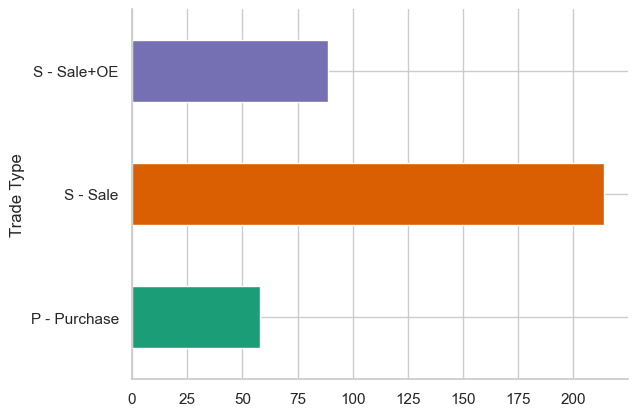

In [212]:
# @title Trade Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Trade\xa0Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

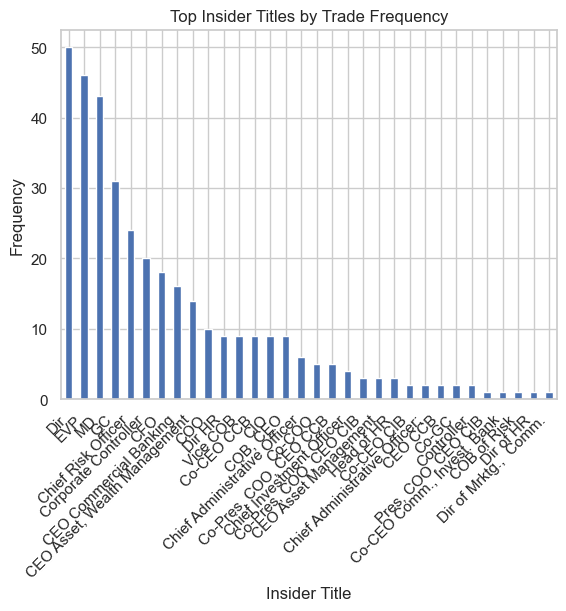

In [214]:
# @title Top Insider Titles by Trade Frequency

import matplotlib.pyplot as plt

# Count the frequency of each Title
title_counts = df['Title'].value_counts()

# Plot the bar chart
title_counts.plot(kind='bar')
plt.xlabel('Insider Title')
plt.ylabel('Frequency')
plt.title('Top Insider Titles by Trade Frequency')
_ = plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

In [216]:
import pandas as pd

# Load the CSV file into a DataFrame (replace 'your_file.csv' with the actual file path)
historical_df= pd.read_csv('C:/Users/Admin/Desktop/DS_project/Insider-Trading/JPMC/data/HistoricalPrices JPM.csv')

# Strip any extra spaces from column names
historical_df.columns = historical_df.columns.str.strip()

# Display the column names to ensure they are correctly read
print(historical_df.columns)

# Convert 'Date' column to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'], errors='coerce', dayfirst=False)

# Convert the numeric columns to proper numeric types
historical_df['Open'] = pd.to_numeric(historical_df['Open'], errors='coerce')
historical_df['High'] = pd.to_numeric(historical_df['High'], errors='coerce')
historical_df['Low'] = pd.to_numeric(historical_df['Low'], errors='coerce')
historical_df['Close'] = pd.to_numeric(historical_df['Close'], errors='coerce')
historical_df['Volume'] = pd.to_numeric(historical_df['Volume'], errors='coerce')

# Display the cleaned DataFrame
print(historical_df.head())
print(historical_df.dtypes)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\3147327910.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



        Date    Open    High     Low   Close    Volume
0 2024-11-12  240.55  241.46  238.76  239.56   6845980
1 2024-11-11  240.00  242.10  239.00  239.29   9017079
2 2024-11-08  239.34  239.34  235.78  236.98   9502100
3 2024-11-07  244.50  244.57  235.22  236.38  16451070
4 2024-11-06  235.00  248.00  234.77  247.06  23987750
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


In [218]:

historical_df.head(20)

Date    Open      High      Low   Close    Volume
0  2024-11-12  240.55  241.4600  238.760  239.56   6845980
1  2024-11-11  240.00  242.1000  239.000  239.29   9017079
2  2024-11-08  239.34  239.3400  235.780  236.98   9502100
3  2024-11-07  244.50  244.5700  235.220  236.38  16451070
4  2024-11-06  235.00  248.0000  234.770  247.06  23987750
5  2024-11-05  220.03  221.9600  220.000  221.49   5600686
6  2024-11-04  222.65  223.7600  219.170  219.78   8229588
7  2024-11-01  223.56  226.1500  222.700  222.94   6923452
8  2024-10-31  224.70  225.6900  221.820  221.92   7829932
9  2024-10-30  222.54  226.3100  221.580  224.41   7110941
10 2024-10-29  225.21  226.7500  222.810  222.90   6580004
11 2024-10-28  223.35  225.6400  222.950  225.50   6842956
12 2024-10-25  225.00  225.6200  220.875  222.31   6369720
13 2024-10-24  221.83  225.0600  221.660  224.98   6002202
14 2024-10-23  223.66  224.7999  222.530  223.41   6180528
15 2024-10-22  223.02  225.2800  221.100  224.12   9586793
16 2024-10-21  225.22  225.7000  222.900  223.00   5869959
17 2024-10-18  225.00  225.9200  223.100  225.37   7000543
18 2024-10-17  224.27  225.8500  223.310  224.42   6470186
19 2024-10-16  222.33  223.6800  221.040  223.64   6382515

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

                         Filing Date                     Trade Date  \
count                            361                            361   
mean   2015-08-24 17:28:42.786703616  2015-08-11 05:59:00.166204928   
min              2003-07-28 16:16:15            2003-07-25 00:00:00   
25%              2011-08-11 12:33:18            2011-08-08 00:00:00   
50%              2015-07-15 17:25:54            2015-07-15 00:00:00   
75%              2020-01-16 16:24:04            2020-01-15 00:00:00   
max              2024-06-20 16:35:02            2024-06-20 00:00:00   
std                              NaN                            NaN   

                 Qty         Owned  
count     361.000000  3.610000e+02  
mean    -8544.764543  7.379070e+05  
min   -821778.000000  0.000000e+00  
25%    -21829.000000  4.471100e+04  
50%    -10000.000000  1.842100e+05  
75%     -3051.000000  3.386760e+05  
max    500000.000000  1.280386e+07  
std     82166.295203  2.307019e+06  
Filing Date     0
Trade Dat

In [222]:
unique_values = df.iloc[:,4].unique()
print(unique_values)

['GC' 'Chief Risk Officer' 'CIO' 'CEO CCB' 'Head of HR'
 'CEO Asset, Wealth Management' 'Co-CEO CIB' 'Corporate Controller'
 'COB, CEO' 'Co-CEO Comm., Invest. Bank' 'Vice COB'
 'CEO Commercial Banking' 'Co-CEO CCB' 'Pres, COO, CEO CIB' 'Dir' 'EVP'
 'Co-Pres, COO, CEO CCB' 'CFO' 'Co-Pres, COO, CEO CIB'
 'CEO Asset Management' 'COO' 'MD' 'Dir HR' 'COB of Risk' 'Co-COO'
 'Chief Administrative Officer;' 'Chief Administrative Officer'
 'Chief Investment Officer' 'Co-GC' 'Controller' 'Dir of HR'
 'Dir of Mrktg.,  Comm.']


In [224]:
df_filtered = df[df.iloc[:,4]== "CEO Asset, Wealth Management" ]
print(df_filtered)
df_filtered.head()


            Filing Date Trade Date Ticker    Insider Name  \
7   2024-05-08 17:22:46 2024-05-08    JPM  Erdoes Mary E.   
20  2024-02-16 19:36:01 2024-02-16    JPM  Erdoes Mary E.   
26  2024-01-16 19:10:20 2024-01-16    JPM  Erdoes Mary E.   
33  2023-06-15 17:31:57 2023-06-15    JPM  Erdoes Mary E.   
40  2023-05-16 16:34:00 2023-05-15    JPM  Erdoes Mary E.   
44  2023-01-17 20:52:20 2023-01-17    JPM  Erdoes Mary E.   
56  2022-10-18 16:24:36 2022-10-17    JPM  Erdoes Mary E.   
65  2021-07-14 17:49:59 2021-07-14    JPM  Erdoes Mary E.   
70  2021-04-15 18:39:19 2021-04-15    JPM  Erdoes Mary E.   
79  2021-01-21 16:31:40 2021-01-19    JPM  Erdoes Mary E.   
84  2020-07-15 18:41:35 2020-07-15    JPM  Erdoes Mary E.   
89  2020-01-17 16:22:23 2020-01-15    JPM  Erdoes Mary E.   
97  2020-01-15 17:55:15 2020-01-15    JPM  Erdoes Mary E.   
110 2019-04-16 17:41:25 2019-04-15    JPM  Erdoes Mary E.   

                            Title    Trade Type   Price    Qty   Owned  ΔOwn  \
7   

Filing Date Trade Date Ticker    Insider Name  \
7  2024-05-08 17:22:46 2024-05-08    JPM  Erdoes Mary E.   
20 2024-02-16 19:36:01 2024-02-16    JPM  Erdoes Mary E.   
26 2024-01-16 19:10:20 2024-01-16    JPM  Erdoes Mary E.   
33 2023-06-15 17:31:57 2023-06-15    JPM  Erdoes Mary E.   
40 2023-05-16 16:34:00 2023-05-15    JPM  Erdoes Mary E.   

                           Title   Trade Type   Price    Qty   Owned ΔOwn  \
7   CEO Asset, Wealth Management     S - Sale  193.66 -15895  585898  -3%   
20  CEO Asset, Wealth Management     S - Sale  178.99  -4814  570003  -1%   
26  CEO Asset, Wealth Management  S - Sale+OE  166.73  -4814  574817  -1%   
33  CEO Asset, Wealth Management     S - Sale  142.15  -8118  560373  -1%   
40  CEO Asset, Wealth Management     S - Sale  134.81  -8119  568491  -1%   

       Value  
7   -3078221  
20   -861665  
26   -802618  
33  -1154002  
40  -1094483

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check summary statistics of the dataset
print(historical_df.describe())

# Check for missing values
print(historical_df.isnull().sum())



                                Date         Open        High          Low  \
count                           5623  5623.000000  5623.00000  5623.000000   
mean   2013-09-11 15:27:02.977058560    74.556330    75.31896    73.792103   
min              2002-07-15 00:00:00    15.370000    16.35000    14.960000   
25%              2008-02-12 12:00:00    39.520000    39.97500    39.050000   
50%              2013-09-12 00:00:00    53.720000    54.10000    53.110000   
75%              2019-04-13 12:00:00   108.155000   109.19000   106.875000   
max              2024-11-12 00:00:00   244.500000   248.00000   239.000000   
std                              NaN    46.466287    46.82469    46.129367   

             Close        Volume  
count  5623.000000  5.623000e+03  
mean     74.570216  2.089878e+07  
min      15.450000  1.347300e+06  
25%      39.565000  1.013114e+07  
50%      53.670000  1.417500e+07  
75%     108.000000  2.440254e+07  
max     247.060000  2.172942e+08  
std      46.48939

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' and 'Trade Date' (using df.iloc[:, 1]) to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Accessing second column for 'Trade Date'



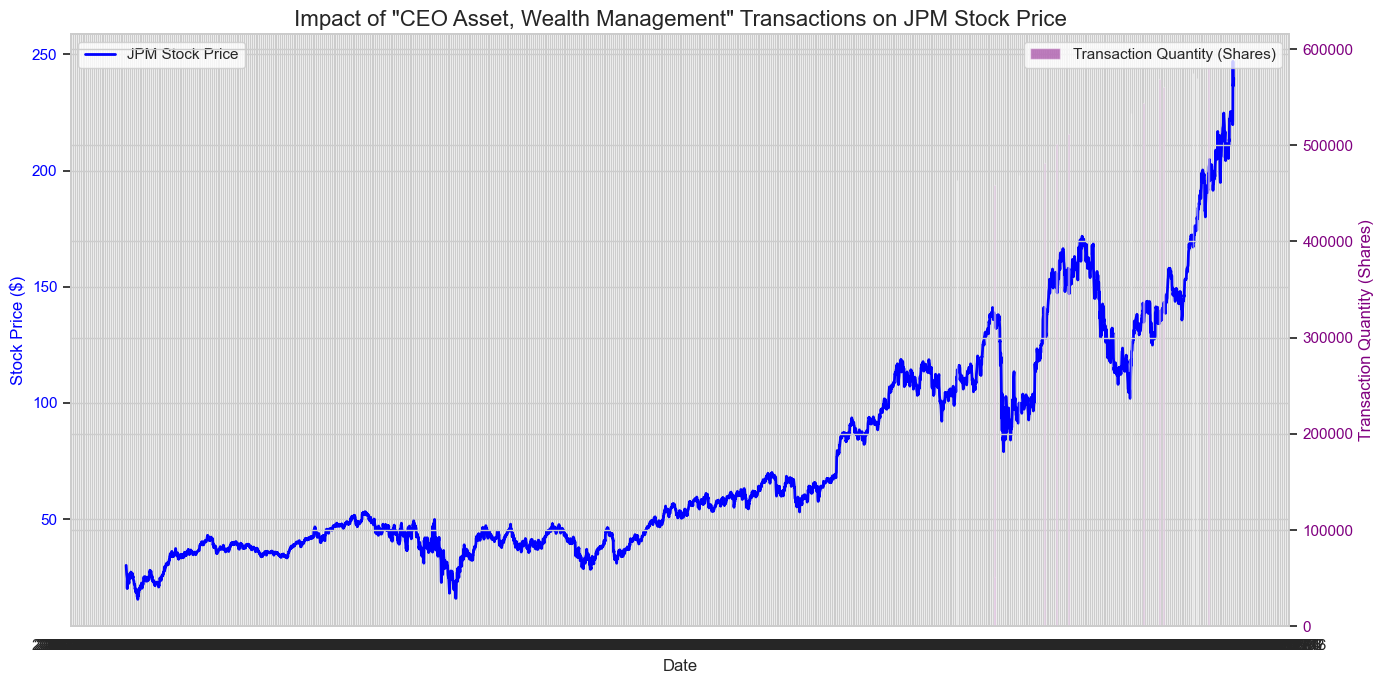

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date column (index 1)

# Filter insider transactions for "CEO Asset, Wealth Management"
df_filtered = df[df.iloc[:, 4] == "CEO Asset, Wealth Management"]  # Title column (index 4)

# Plot historical stock price data with a dual-axis for transaction quantities
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary y-axis for historical stock closing prices
ax1.plot(historical_df['Date'], historical_df['Close'], color='blue', label='JPM Stock Price', lw=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Stock Price ($)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Secondary y-axis for transaction quantities by CEO Asset, Wealth Management
ax2 = ax1.twinx()
ax2.bar(df_filtered.iloc[:, 1], df_filtered.iloc[:, 8], color='purple', alpha=0.5, label='Transaction Quantity (Shares)', width=5)
ax2.set_ylabel('Transaction Quantity (Shares)', fontsize=12, color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

# Highlight significant dates
plt.title('Impact of "CEO Asset, Wealth Management" Transactions on JPM Stock Price', fontsize=16)
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show plot with dual y-axis
plt.tight_layout()
plt.show()


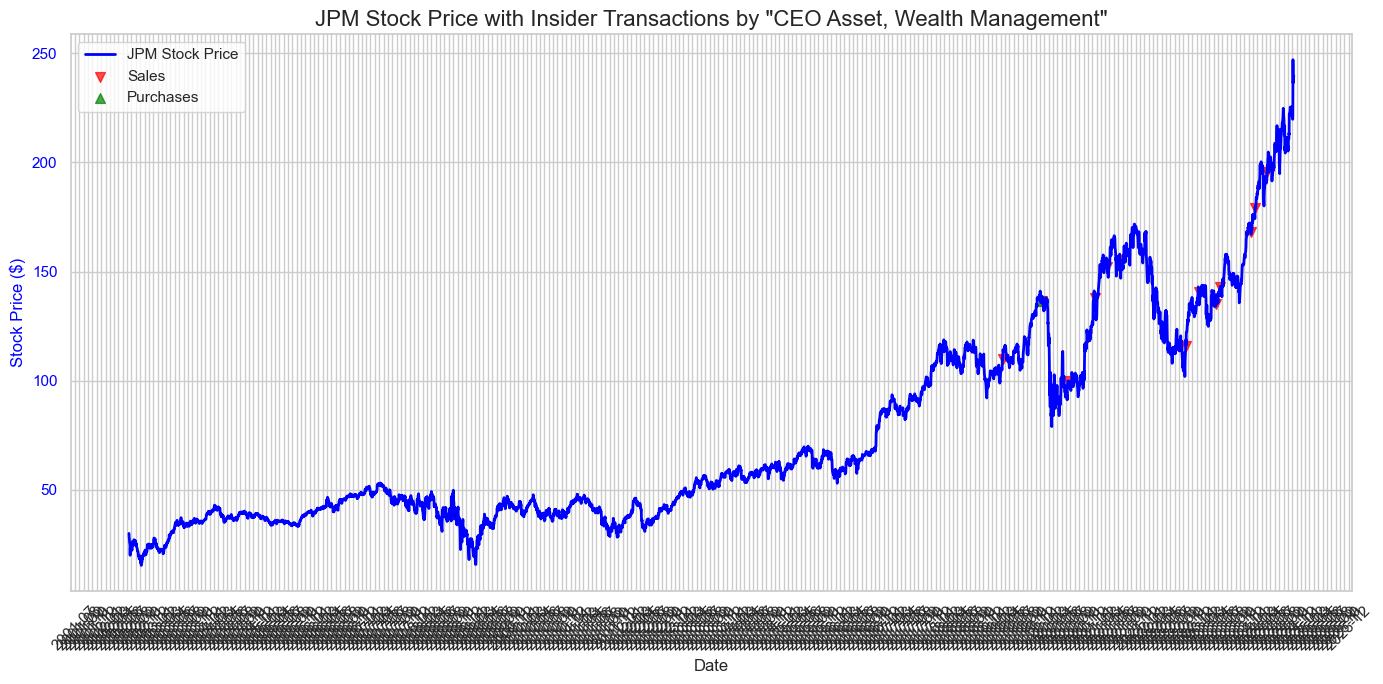

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "CEO Asset, Wealth Management"
df_filtered = df[df.iloc[:, 4] == "CEO Asset, Wealth Management"]

# Ensure 'Trade Type' column (index 6) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 6] = df_filtered.iloc[:, 6].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 6)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Plot historical stock closing prices
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the historical close prices as a line plot
ax1.plot(historical_df['Date'], historical_df['Close'], color='blue', label='JPM Stock Price', linewidth=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Stock Price ($)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis for better readability by only showing major dates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels to avoid overlap
plt.xticks(rotation=45)

# Plot insider sales as red dots on the stock price line
ax1.scatter(df_sales.iloc[:, 1], historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
            color='red', label='Sales', s=50, marker='v', alpha=0.7)

# Plot insider purchases as green dots on the stock price line
ax1.scatter(df_purchases.iloc[:, 1], historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
            color='green', label='Purchases', s=50, marker='^', alpha=0.7)

# Add legend for the plot
ax1.legend(loc="upper left")

# Add plot title
plt.title('JPM Stock Price with Insider Transactions by "CEO Asset, Wealth Management"', fontsize=16)

# Adjust layout and show plot
fig.tight_layout()
plt.show()


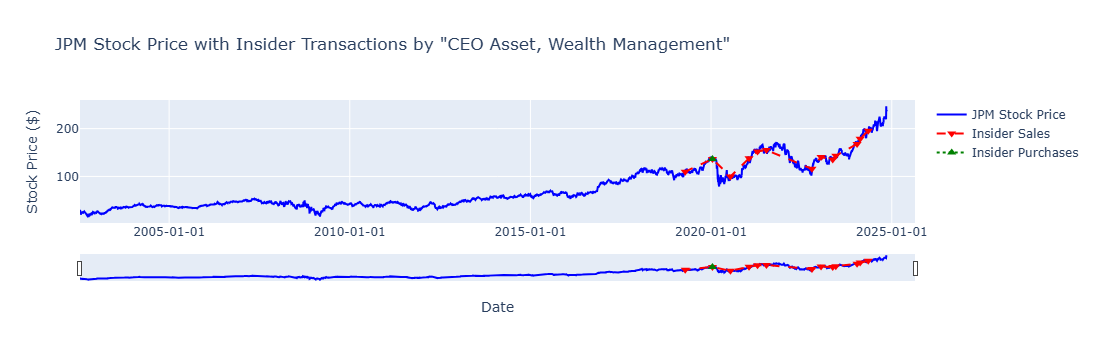

In [232]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "CEO Asset, Wealth Management"
df_filtered = df[df.iloc[:, 4] == "CEO Asset, Wealth Management"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "CEO Asset, Wealth Management"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


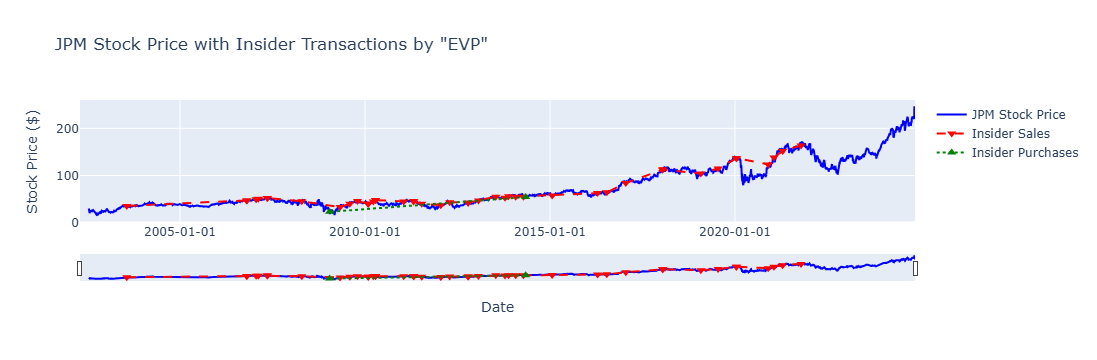

In [233]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "EVP"
df_filtered = df[df.iloc[:, 4] == "EVP"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "EVP"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


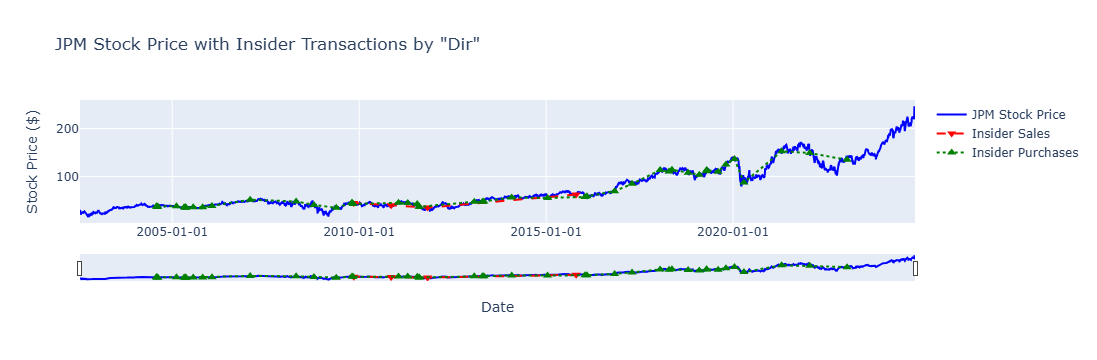

In [234]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "Dir"
df_filtered = df[df.iloc[:, 4] == "Dir"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "Dir"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


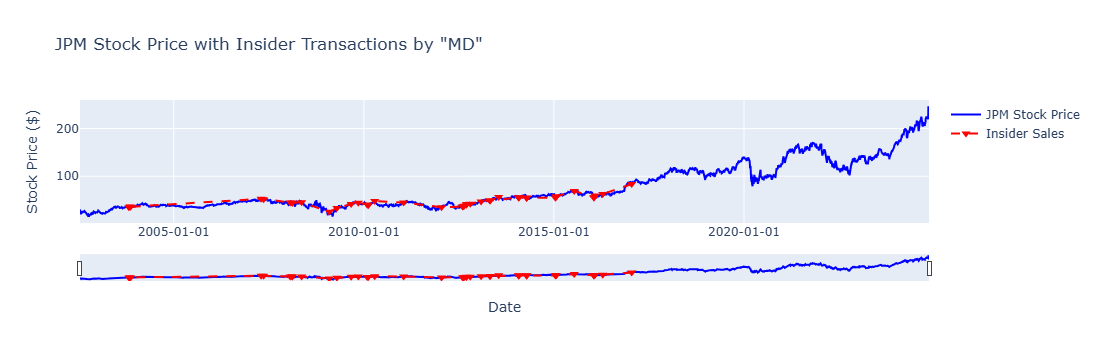

In [235]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "MD"
df_filtered = df[df.iloc[:, 4] == "MD"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "MD"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


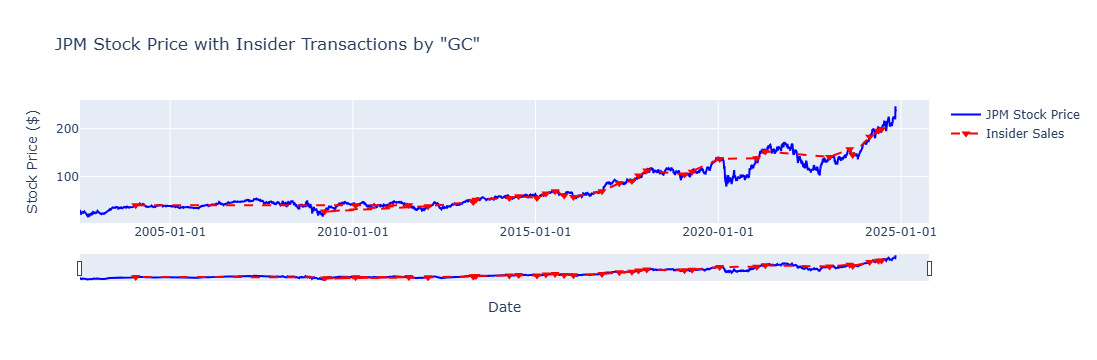

In [236]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "GC"
df_filtered = df[df.iloc[:, 4] == "GC"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "GC"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**The following analysis is for another company - VISA**

In [238]:
# Importing necessary libraries:
# - pandas and numpy: for data manipulation and numerical computations.
# - matplotlib.pyplot and seaborn: for data visualization.
# - datetime.timedelta: for handling time-related operations.
# - scipy.stats: for statistical analysis (e.g., standard error, t-tests).
# - sklearn.model_selection: for splitting datasets into training and testing sets.
# - sklearn.ensemble.RandomForestClassifier: for building classification models.
# - sklearn.metrics: for evaluating classification performance (e.g., ROC AUC, classification reports).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from scipy.stats import sem, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
historical_visa_df = pd.read_csv("C:/Users/Admin/Desktop/DS_project/Insider-Trading/VISA/data/VISAHistoricalPrices.csv")

In [240]:
historical_visa_df

Date      Open      High       Low     Close     Volume
0     11/13/24  309.4900  310.9485  307.8400  309.4800    4046544
1     11/12/24  309.0400  310.5500  308.1100  309.8500    4616616
2     11/11/24  310.0900  312.4400  309.3000  310.9200    4674088
3     11/08/24  306.8900  311.1500  305.6900  307.8700    6240616
4     11/07/24  307.5000  307.6300  304.4200  305.8000    6237348
...        ...       ...       ...       ...       ...        ...
4189  03/26/08   15.6825   16.1200   15.3925   15.9900   43094600
4190  03/25/08   15.1450   16.0625   14.9550   15.8125   87077204
4191  03/24/08   16.8100   16.9250   14.7500   14.9325  149497408
4192  03/20/08   14.6000   16.2500   14.3750   16.0875  198710564
4193  03/19/08   14.8750   17.2500   13.7500   14.1250  708240376

[4194 rows x 6 columns]

In [241]:
visa_df = pd.read_excel("C:/Users/Admin/Desktop/DS_project/Insider-Trading/VISA/data/VISAInsider.xlsx")
visa_df

visa_df = visa_df.drop(['X', '1d', '1w', '1m', '6m'], axis='columns')

In [242]:
# df = df.drop(['X', '1d', '1w', '1m', '6m'], axis='columns')
historical_visa_df.columns

historical_visa_df

# Strip any extra spaces from column names
historical_visa_df.columns = historical_visa_df.columns.str.strip()

# Display the column names to ensure they are correctly read
print(historical_visa_df.columns)

# Convert 'Date' column to datetime format
historical_visa_df['Date'] = pd.to_datetime(historical_visa_df['Date'], errors='coerce', dayfirst=False)

# Convert the numeric columns to proper numeric types
historical_visa_df['Open'] = pd.to_numeric(historical_visa_df['Open'], errors='coerce')
historical_visa_df['High'] = pd.to_numeric(historical_visa_df['High'], errors='coerce')
historical_visa_df['Low'] = pd.to_numeric(historical_visa_df['Low'], errors='coerce')
historical_visa_df['Close'] = pd.to_numeric(historical_visa_df['Close'], errors='coerce')
historical_visa_df['Volume'] = pd.to_numeric(historical_visa_df['Volume'], errors='coerce')


# Display the cleaned DataFrame
print(historical_visa_df.head())
print(historical_visa_df.dtypes)





Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\3068849342.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



        Date    Open      High     Low   Close   Volume
0 2024-11-13  309.49  310.9485  307.84  309.48  4046544
1 2024-11-12  309.04  310.5500  308.11  309.85  4616616
2 2024-11-11  310.09  312.4400  309.30  310.92  4674088
3 2024-11-08  306.89  311.1500  305.69  307.87  6240616
4 2024-11-07  307.50  307.6300  304.42  305.80  6237348
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


In [243]:
# Convert 'Filing Date' and 'Trade Date' to datetime format using index positions 0 and 1
visa_df.iloc[:, 0] = pd.to_datetime(visa_df.iloc[:, 0], errors='coerce')
visa_df.iloc[:, 1] = pd.to_datetime(visa_df.iloc[:, 1], errors='coerce')

# Clean 'Price' and 'Value' columns using index positions 6 and 10
# Clean 'Price' and 'Value' columns using index positions 6 and 10
visa_df.iloc[:, 6] = pd.to_numeric(visa_df.iloc[:, 6].replace(r'[\$,]', '', regex=True), errors='coerce')
visa_df.iloc[:, 10] = pd.to_numeric(visa_df.iloc[:, 10].replace(r'[\$,]', '', regex=True), errors='coerce')


# Convert 'Qty' column (index 7) to numeric, handling commas
visa_df.iloc[:, 7] = pd.to_numeric(visa_df.iloc[:, 7].replace('[,]', '', regex=True), errors='coerce')


In [244]:
visa_df

Filing Date Trade Date Ticker                      Insider Name  \
0   2024-11-01 16:12:02 2024-11-01      V                Rottenberg Julie B   
1   2024-11-01 16:10:13 2024-11-01      V                    McInerney Ryan   
2   2024-10-02 16:06:54 2024-10-01      V                    McInerney Ryan   
3   2024-09-04 16:11:34 2024-09-03      V                    McInerney Ryan   
4   2024-08-30 16:09:22 2024-08-29      V                Rottenberg Julie B   
..                  ...        ...    ...                               ...   
260 2008-03-25 16:56:26 2008-03-25      V                 Saunders Joseph W   
261 2008-03-25 16:56:12 2008-03-25      V  Van Der Velde Johannes (Hans) I.   
262 2008-03-25 16:55:58 2008-03-25      V                   Swainson John A   
263 2008-03-25 16:55:41 2008-03-25      V                Shanahan William S   
264 2008-03-25 16:55:25 2008-03-25      V                 Sheedy William M.   

                            Title    Trade Type   Price     Qty   Owned  \
0                              GC   S - Sale+OE  288.49   -2572    5893   
1                             CEO   S - Sale+OE  288.49   -8620  211854   
2                             CEO   S - Sale+OE  276.97   -8620  211854   
3                             CEO   S - Sale+OE  276.37   -8620  211854   
4                              GC   S - Sale+OE   275.0   -2572    5893   
..                            ...           ...     ...     ...     ...   
260                      COB, CEO  P - Purchase    44.0   72500   83295   
261                           Dir  P - Purchase    44.0    4000    4000   
262                           Dir  P - Purchase    44.0    2000    5682   
263                           Dir  P - Purchase    44.0  125000  128682   
264  Global Head of Corp Strategy  P - Purchase    44.0    3500   11563   

      ΔOwn     Value  
0     -30%   -741996  
1      -4%  -2486784  
2      -4%  -2387481  
3      -4%  -2382309  
4     -30%   -707300  
..     ...       ...  
260  +672%   3190000  
261    New    176000  
262   +54%     88000  
263  >999%   5500000  
264   +43%    154000  

[265 rows x 11 columns]

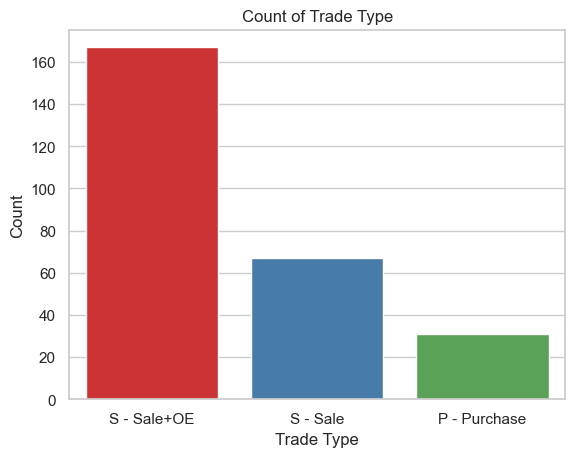

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot with Seaborn
column_name = visa_df.columns[5]
sns.countplot(data=visa_df, hue=column_name, x=column_name, palette='Set1', legend=False)
plt.xlabel('Trade Type')
plt.ylabel('Count')
plt.title('Count of Trade Type')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\564205401.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




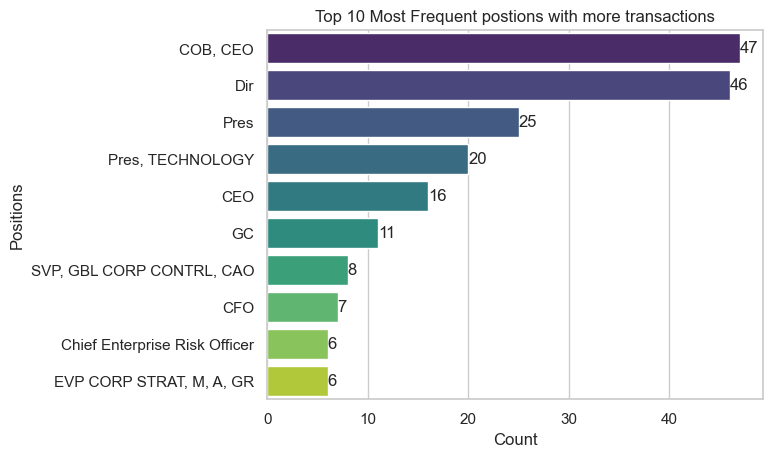

In [246]:
column_name = visa_df.columns[4]
top_10_names = visa_df[column_name].value_counts().nlargest(10)

# Plotting with Seaborn
sns.barplot(x=top_10_names.values, y=top_10_names.index, palette='viridis', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Positions')
plt.title('Top 10 Most Frequent postions with more transactions')
# plt.show()
for index, value in enumerate(top_10_names.values):
    plt.text(value, index, str(value), va='center')  # value and index position the text at the end of each bar

plt.show()

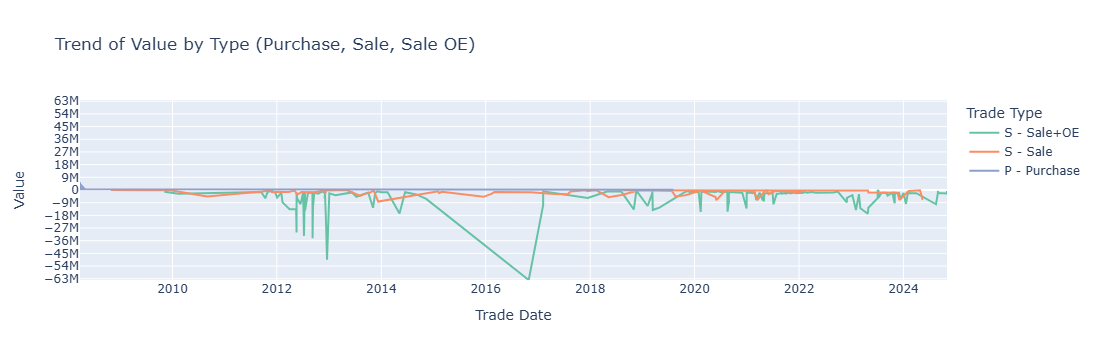

In [247]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame with columns: 'date', 'type', 'value'
# df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format

date = visa_df.columns[1]
value = visa_df.columns[10]
cat = visa_df.columns[5]

# Create an interactive line plot with Plotly Express
fig = px.line(visa_df, x=date, y=value, color=cat, 
              labels={'value': 'Value', 'date': 'Date'},
              title='Trend of Value by Type (Purchase, Sale, Sale OE)',
              color_discrete_sequence=px.colors.qualitative.Set2)


max_value = visa_df[value].max()
min_value = visa_df[value].min()

# Set the y-axis range to be symmetrical
fig.update_layout(
    yaxis=dict(
        range=[min(min_value, -max_value), max(max_value, -min_value)],
        dtick=9000000  
        # Ensures symmetry around zero
    )
)

# Show the plot
fig.show()

In [248]:
insider_trades = pd.read_excel('C:/Users/Admin/Desktop/DS_project/Insider-Trading/VISA/data/VISAInsider.xlsx')
stock_prices = pd.read_csv('C:/Users/Admin/Desktop/DS_project/Insider-Trading/VISA/data/VISAHistoricalPrices.csv')

insider_trades.iloc[:, 2]= pd.to_datetime(insider_trades.iloc[:, 2])
stock_prices.iloc[:, 0] = pd.to_datetime(stock_prices.iloc[:, 0])

# Sort data by date
insider_trades.sort_values(by=insider_trades.columns[2], inplace=True)
stock_prices.sort_values(by=stock_prices.columns[0], inplace=True)

# Rename columns in stock_prices for easier access (remove spaces)
stock_prices.columns = [col.strip() for col in stock_prices.columns]
stock_prices['return'] = stock_prices['Close'].pct_change()

# Step 2: Filter for 'Buy' Insider Trading Events
# Assuming 'Trade_Type  ' column specifies 'Buy' for purchase transactions
buy_trades = insider_trades[insider_trades.iloc[:, 6].str.strip() == 'P - Purchase']

buy_trades


# # Step 1: Calculate Daily Returns for Stock Prices
# historical_visa_df['return'] = historical_visa_df['Close'].pct_change()

# print(visa_df[visa_df.iloc[:, 6]])

# Step 2: Filter for 'Buy' Insider Trading Events
# Assuming 'Trade_Type  ' column specifies 'Buy' for purchase transactions
# buy_trades = visa_df[visa_df.iloc[:, 6].str.strip() == 'P - Purchase']

# buy_trades

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\1358185892.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



X         Filing Date Trade Date Ticker  \
264  NaN 2008-03-25 16:55:25 2008-03-25      V   
242    A 2008-08-22 10:21:17 2008-03-25      V   
243    A 2008-08-22 10:20:43 2008-03-25      V   
245  NaN 2008-04-16 16:28:58 2008-03-25      V   
246  NaN 2008-03-25 17:00:19 2008-03-25      V   
247  NaN 2008-03-25 17:00:06 2008-03-25      V   
248  NaN 2008-03-25 16:59:55 2008-03-25      V   
249  NaN 2008-03-25 16:59:44 2008-03-25      V   
250  NaN 2008-03-25 16:59:28 2008-03-25      V   
251  NaN 2008-03-25 16:59:17 2008-03-25      V   
252  NaN 2008-03-25 16:58:38 2008-03-25      V   
263  NaN 2008-03-25 16:55:41 2008-03-25      V   
254  NaN 2008-03-25 16:58:09 2008-03-25      V   
262  NaN 2008-03-25 16:55:58 2008-03-25      V   
261  NaN 2008-03-25 16:56:12 2008-03-25      V   
260  NaN 2008-03-25 16:56:26 2008-03-25      V   
259  NaN 2008-03-25 16:56:39 2008-03-25      V   
253  NaN 2008-03-25 16:58:23 2008-03-25      V   
257  NaN 2008-03-25 16:57:19 2008-03-25      V   
256  NaN 2008-03-25 16:57:34 2008-03-25      V   
255  NaN 2008-03-25 16:57:54 2008-03-25      V   
258  NaN 2008-03-25 16:57:07 2008-03-25      V   
244  NaN 2008-05-01 20:28:10 2008-04-30      V   
240  NaN 2008-11-04 14:23:04 2008-10-24      V   
239  NaN 2008-12-03 13:23:25 2008-12-02      V   
238  NaN 2008-12-05 13:48:15 2008-12-03      V   
237  NaN 2008-12-10 14:46:49 2008-12-05      V   
235  NaN 2009-05-05 19:14:28 2009-05-05      V   
161  NaN 2014-03-18 18:21:36 2014-03-17      V   
37     M 2023-02-17 16:15:01 2018-11-16      V   
125  NaN 2019-08-07 19:00:46 2019-08-06      V   

                            Insider Name                          Title  \
264                    Sheedy William M.   Global Head of Corp Strategy   
242                      Doyle Charles T                            Dir   
243                         Al-Qadi Hani                            Dir   
245                       Morris John C.                           Pres   
246                         Al-Qadi Hani                            Dir   
247                       Buse Elizabeth         Global Head of Product   
248                      Cranston Mary B                            Dir   
249                   Coughlan Gary P/pa                            Dir   
250  Fernandez-Carbajal Francisco Javier                            Dir   
251                      Floum Joshua R.                  GC, Corp. Sec   
252                        Hawkins Peter                            Dir   
263                   Shanahan William S                            Dir   
254                 Johnson Suzanne Nora                            Dir   
262                      Swainson John A                            Dir   
261     Van Der Velde Johannes (Hans) I.                            Dir   
260                    Saunders Joseph W                       COB, CEO   
259                         Richey Ellen  Chief Enterprise Risk Officer   
253                 Matschullat Robert W                            Dir   
257                       McKay David I.                            Dir   
256                     Minehan Cathy E.                            Dir   
255                      Doyle Charles T                            Dir   
258                   Pollitt Byron H Jr                            CFO   
244                     Minehan Cathy E.                            Dir   
240                        Pang David J.                            Dir   
239                   Pollitt Byron H Jr                            CFO   
238                    Saunders Joseph W                       COB, CEO   
237                    Saunders Joseph W                       COB, CEO   
235                     Minehan Cathy E.                            Dir   
161                    Kelly Alfred F Jr                            Dir   
37                     Morrison Denise M                            Dir   
125                    Morrison Denise M                            Dir   

     

In [249]:

# Step 3: Event Study Analysis - Calculate Cumulative Abnormal Return (CAR)
event_window = 5  # Event window size (e.g., 5 days before and after the event)

# Initialize an empty list to store CAR for each event
car_results = []

for _, trade in buy_trades.iterrows():
    event_date = trade.iloc[2]  # Access the third column,'Trade Date'
    
    # Define window around the event
    start_date = event_date - timedelta(days=event_window)
    end_date = event_date + timedelta(days=event_window)
    
    # Get stock data within the event window and create a copy
    window_data = stock_prices[(stock_prices['Date'] >= start_date) & (stock_prices['Date'] <= end_date)].copy()
    
    # Calculate abnormal returns by subtracting the average market return (baseline)
    baseline_return = stock_prices['return'].mean()
    window_data['abnormal_return'] = window_data['return'] - baseline_return
    
    # Calculate cumulative abnormal return (CAR) for the event
    car = window_data['abnormal_return'].sum()
    car_results.append({'event_date': event_date, 'CAR': car})

# Convert CAR results into a DataFrame
car_df = pd.DataFrame(car_results)
print(car_df)


   event_date       CAR
0  2008-03-25  0.113088
1  2008-03-25  0.113088
2  2008-03-25  0.113088
3  2008-03-25  0.113088
4  2008-03-25  0.113088
5  2008-03-25  0.113088
6  2008-03-25  0.113088
7  2008-03-25  0.113088
8  2008-03-25  0.113088
9  2008-03-25  0.113088
10 2008-03-25  0.113088
11 2008-03-25  0.113088
12 2008-03-25  0.113088
13 2008-03-25  0.113088
14 2008-03-25  0.113088
15 2008-03-25  0.113088
16 2008-03-25  0.113088
17 2008-03-25  0.113088
18 2008-03-25  0.113088
19 2008-03-25  0.113088
20 2008-03-25  0.113088
21 2008-03-25  0.113088
22 2008-04-30  0.160916
23 2008-10-24 -0.032587
24 2008-12-02  0.024591
25 2008-12-03  0.079725
26 2008-12-05  0.014311
27 2009-05-05  0.070956
28 2014-03-17 -0.023545
29 2018-11-16 -0.074075
30 2019-08-06  0.001547


We are focusing on the following types of visualizations to capture market reactions to insider trading events, especially regarding the direction and magnitude of changes in Visa's stock price. 

**Cumulative Abnormal Return (CAR) Around Insider Trading Events:**

-> The cumulative abnormal return (CAR) is a major indicator used by investors and financial analysts to assess a company or portfolio's actual performance in comparison to expectations. CAR calculates an investment's total anomalous returns over a set period of time, typically following an event such as a merger, earnings announcement, or regulatory change. If you're reviewing an investment and want to know how an event affected its returns, understanding CAR can help.
-> This following visualization shows the CAR for each event to see the magnitude and direction of stock price movement around insider trades.

**Plotting CAR for Each Insider Trading Event:**
Purpose: This line plot displays the CAR for each insider trading event individually, showing the direction and magnitude of stock price movement (abnormal return) for each event.

Each point represents a cumulative abnormal return for a specific insider trade. The x-axis shows the event date, and the y-axis shows CAR. A line at 0 on the y-axis represents no abnormal return.

Positive CAR values indicate that the stock price increased more than the baseline average return after the insider purchase, suggesting market optimism.

Negative CAR values show a decline beyond the baseline, possibly reflecting market skepticism.

Insights: By looking at each event, you can identify patterns, such as whether insider trading events frequently lead to positive or negative abnormal returns.

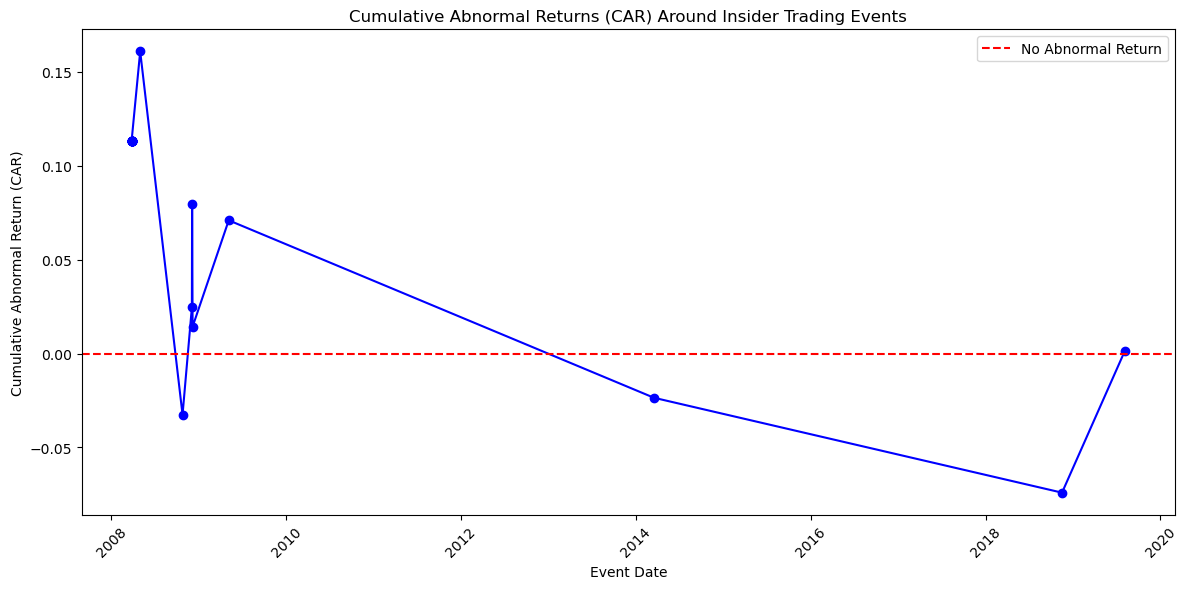

In [93]:
# 1. Plotting CAR for Each Insider Trading Event
plt.figure(figsize=(12, 6))
plt.plot(car_df['event_date'], car_df['CAR'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Cumulative Abnormal Returns (CAR) Around Insider Trading Events")
plt.xlabel("Event Date")
plt.ylabel("Cumulative Abnormal Return (CAR)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Average CAR Across All Insider Events with Confidence Intervals:**

Purpose: This bar plot shows the average CAR across all insider trading events, with a 95% confidence interval (CI) around the mean.

The bar represents the mean CAR across all insider events, and the error bars indicate the 95% CI. If the CI does not intersect the 0 line, it suggests a statistically significant average effect.

If the bar (mean CAR) is positive and does not intersect with 0, it implies a general tendency for the stock price to increase following insider trades.

If it’s negative and does not intersect with 0, it suggests a tendency for the stock price to decrease post-insider trading events.

Insights: This visualization summarizes the overall impact of insider trades on stock prices, indicating whether they lead to consistent upward or downward movements and if this impact is statistically significant.

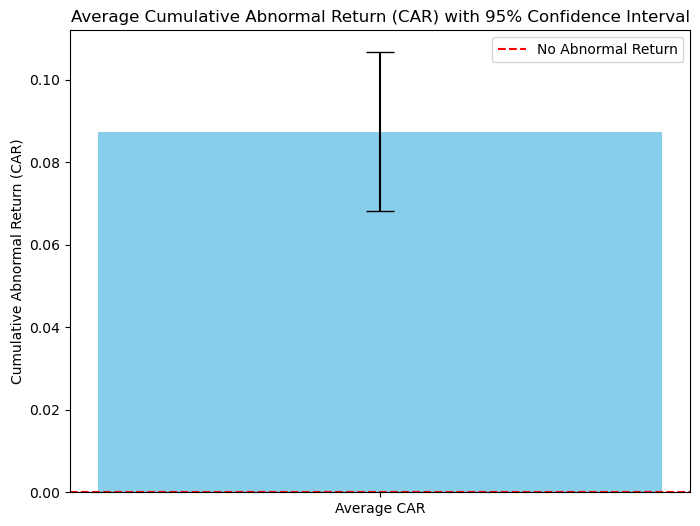

In [96]:
# 2. Average CAR Across All Insider Events with Confidence Intervals
mean_car = car_df['CAR'].mean()
car_sem = sem(car_df['CAR'])

plt.figure(figsize=(8, 6))
plt.bar(['Average CAR'], [mean_car], yerr=[1.96 * car_sem], capsize=10, color='skyblue')
plt.axhline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Average Cumulative Abnormal Return (CAR) with 95% Confidence Interval")
plt.ylabel("Cumulative Abnormal Return (CAR)")
plt.legend()
plt.show()

**Histogram of CAR Values Across Events:**

Purpose: This histogram visualizes the distribution of CAR values across all insider trading events, helping to identify the overall direction (positive or negative) and spread of market reactions.

A right-skewed distribution with more positive CAR values suggests that insider trades tend to generate positive abnormal returns, indicating favorable market sentiment.

A left-skewed distribution with more negative CAR values would imply that insider trades often coincide with negative abnormal returns.

If CAR values are centered around zero, this suggests minimal consistent market reaction to insider trades.

Insights: This histogram provides a quick visual summary of how insider trades affect stock prices on average. If the distribution is largely positive, it would align with the hypothesis that insider purchases are a bullish signal to the market.

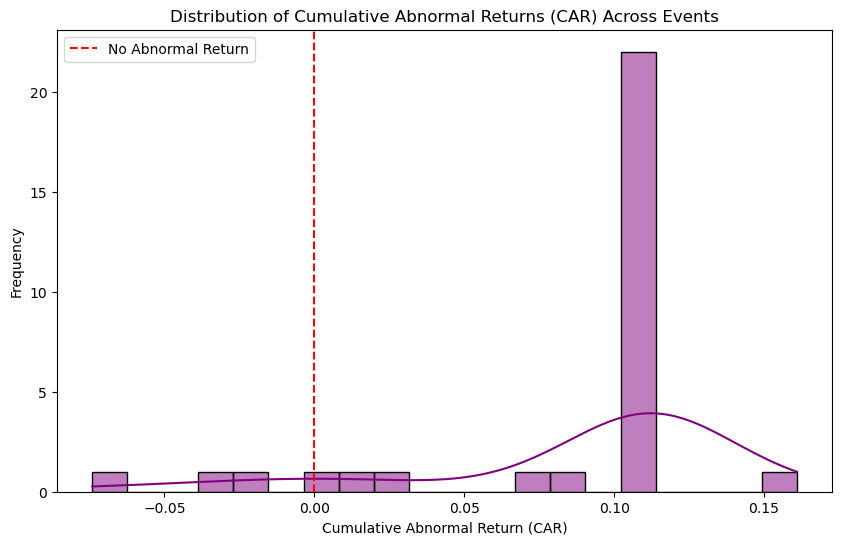

In [99]:
# 3. Histogram of CAR Values Across Events
plt.figure(figsize=(10, 6))
sns.histplot(car_df['CAR'], bins=20, color='purple', kde=True)
plt.axvline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Distribution of Cumulative Abnormal Returns (CAR) Across Events")
plt.xlabel("Cumulative Abnormal Return (CAR)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Statistical Test for CAR Significance:**

Purpose: This statistical test (t-test) checks if the average CAR is significantly different from zero across all events, providing a quantitative measure of significance.

A p-value less than 0.05 would indicate that the CARs are significantly different from zero, supporting the notion that insider trades have a significant impact on stock prices.

If the p-value is greater than 0.05, we do not have enough statistical evidence to conclude that insider trades consistently impact stock price movements.

Insights: This test provides quantitative validation for your findings. A significant result implies that the impact of insider trades is non-random and could be used for predicting market behavior in response to insider events.

In [104]:
# Step 4: Statistical Test for CAR Significance
# Run a t-test to check if CARs are significantly different from zero
t_stat, p_value = ttest_1samp(car_df['CAR'], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation of p-value:
# - If p-value < 0.05, CARs are significantly different from zero at a 5% level.

T-statistic: 8.901104576270315, P-value: 6.40019132386293e-10


**These visualizations, together, help identify both individual and aggregate trends, allowing you to determine the direction, consistency, and significance of market reactions to insider trading events.**

**Predictive Modeling of Post-Trade Price Movements:**

Description: Build a predictive model that uses insider trading details (e.g., role, trade size, timing) and other stock/macro data (e.g., historical prices, trading volumes) to forecast short-term price movements.

Insight: This helps assess the predictive power of insider trading events on CVS Health's stock, aligning with your abstract’s aim of enhancing forecasting accuracy.

Steps:
Use insider trading details, historical stock returns, trading volume, and relevant macroeconomic indicators as features.
Build a model (e.g., logistic regression, random forest) to predict the direction of stock movement (up/down) or the CAR magnitude after each trade.
Potential Visualization: Feature importance plot for model insights, or ROC curve for classification performance.

In [109]:
# Convert date columns to datetime and set as index, removing duplicates
insider_trades.iloc[:, 2] = pd.to_datetime(insider_trades.iloc[:, 2], errors='coerce')
stock_prices.iloc[:, 0] = pd.to_datetime(stock_prices.iloc[:, 0], errors='coerce')

# Remove duplicates in date columns to make the index unique
insider_trades = insider_trades.drop_duplicates(subset=insider_trades.columns[2])
stock_prices = stock_prices.drop_duplicates(subset=stock_prices.columns[0])

# Set the date columns as the index
insider_trades.set_index(insider_trades.columns[2], inplace=True)
stock_prices.set_index(stock_prices.columns[0], inplace=True)

# Concatenate along columns
data = pd.concat([insider_trades, stock_prices], axis=1, join='inner').fillna(0)

# Check the resulting columns
print(data.columns)


#data = pd.merge(insider_trades, stock_prices, left_on= insider_trades.iloc[:, 2], right_on=stock_prices.iloc[:, 0])
#data.fillna(0, inplace=True)
#data.columns

Index(['X', 'Filing Date', 'Ticker', 'Insider Name', 'Title', 'Trade Type',
       'Price', 'Qty', 'Owned', 'ΔOwn', 'Value', '1d', '1w', '1m', '6m',
       'Open', 'High', 'Low', 'Close', 'Volume', 'return'],
      dtype='object')


C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



In [111]:
# Calculate daily, weekly, and monthly percentage changes in price and volume
data['Daily_Price_Change'] = data['Close'].pct_change(periods=1)
data['Weekly_Price_Change'] = data['Close'].pct_change(periods=5)
data['Monthly_Price_Change'] = data['Close'].pct_change(periods=21)

data['Daily_Volume_Change'] = data['Volume'].pct_change(periods=1)
data['Weekly_Volume_Change'] = data['Volume'].pct_change(periods=5)
data['Monthly_Volume_Change'] = data['Volume'].pct_change(periods=21)

# Calculate moving averages for trend indication
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Volatility as a rolling standard deviation
data['Volatility'] = data['Close'].rolling(window=5).std()


In [113]:
# Define target variable based on post-trade price change (up: 1, down: 0)
data['Price_Direction'] = (data['Daily_Price_Change'].shift(-1) > 0).astype(int)
data = data.dropna(subset=['Price_Direction'])


In [115]:
# Define feature columns
features = [
    'Daily_Price_Change', 'Weekly_Price_Change', 'Monthly_Price_Change',
    'Daily_Volume_Change', 'Weekly_Volume_Change', 'Monthly_Volume_Change',
    'MA_5', 'MA_20', 'MA_50', 'Volatility'
]

X = data[features]
y = data['Price_Direction']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [117]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [119]:
# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_score:.2f}")


              precision    recall  f1-score   support

           0       0.18      0.17      0.17        18
           1       0.71      0.73      0.72        51

    accuracy                           0.58        69
   macro avg       0.44      0.45      0.44        69
weighted avg       0.57      0.58      0.58        69

AUC-ROC Score: 0.45


**Feature Importance Plot: This plot sorts features by their importance, providing clarity on which features contribute the most to the model’s predictions. The use of color gradients and annotations enhances readability.**

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\1451773346.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




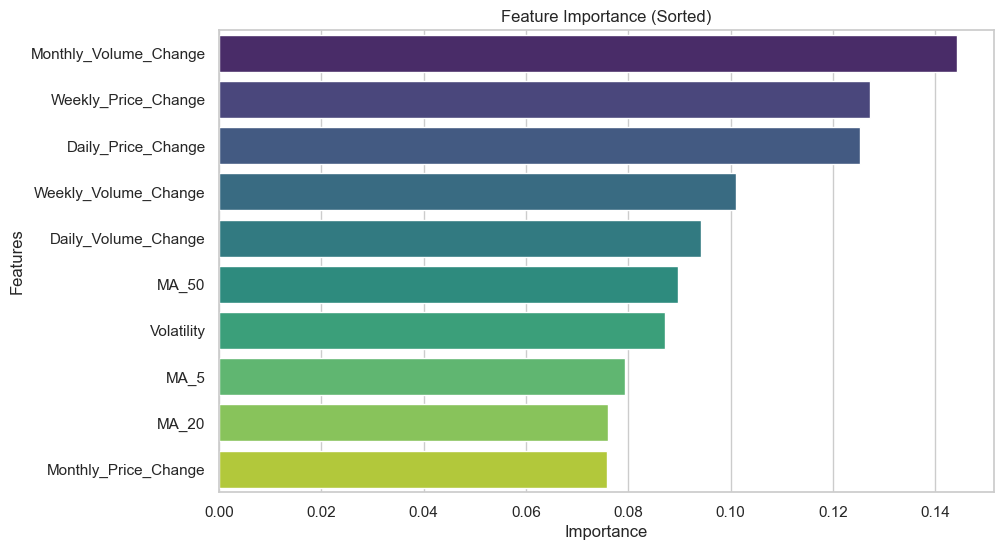

In [122]:

# Set style for better visuals
sns.set(style="whitegrid")

# Step 1: Enhanced Feature Importance Plot
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_features = [features[i] for i in indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_features, palette="viridis")
    plt.title("Feature Importance (Sorted)")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance(model, features)

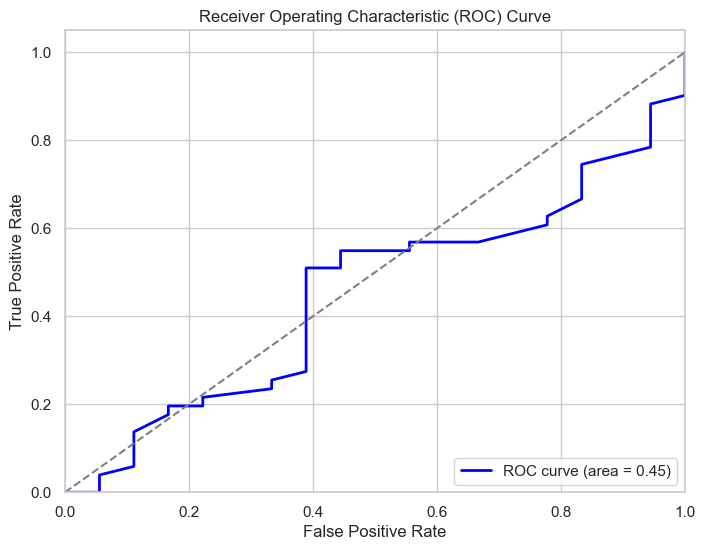

In [124]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
#Detailed ROC Curve Plot
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(y_test, y_pred_proba)

**ROC Curve: A refined ROC curve with an AUC value clearly indicated, and a diagonal line for reference, gives insight into model performance across different thresholds.**

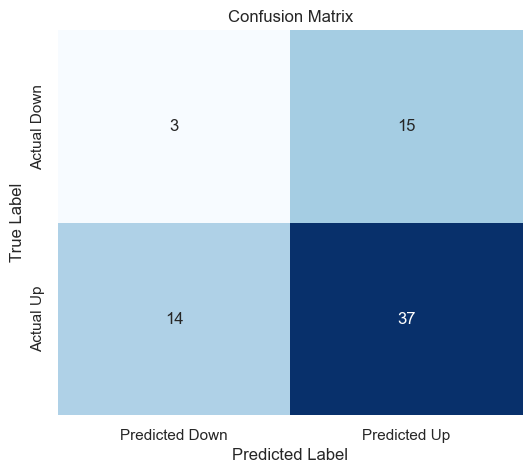

In [127]:
# Confusion Matrix with Heatmap
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Down', 'Predicted Up'], 
                yticklabels=['Actual Down', 'Actual Up'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


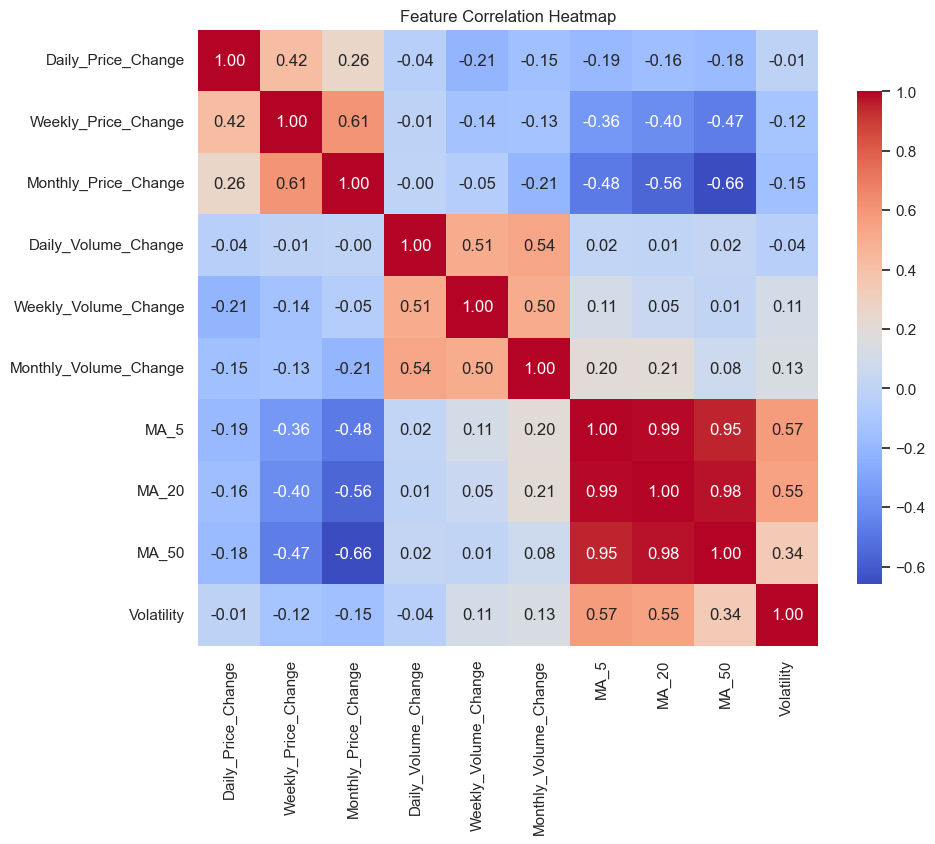

In [129]:
# Correlation Heatmap for Features
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': .8})
plt.title("Feature Correlation Heatmap")
plt.show()

**Correlation Heatmap: This plot helps identify correlations between features, which can reveal redundancy in predictors and guide feature selection.**

**The following analysis is done on CVS HEALTH.**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from scipy.stats import sem, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Replace with the paths to your files if necessary
insider_trades = pd.read_excel('C:/Users/Admin/Desktop/DS_project/Insider-Trading/CVS/data/cvs_health.xlsx')
stock_prices = pd.read_excel('C:/Users/Admin/Desktop/DS_project/Insider-Trading/CVS/data/historical_prices_cvs.xlsx')

In [152]:
print("Insider Trades Columns:", insider_trades.columns)
print("Stock Prices Columns:", stock_prices.columns)

Insider Trades Columns: Index(['X', 'Filing_Date', 'Trade Date', 'Ticker', 'Insider Name', 'Title',
       'Trade_Type', 'Price', 'Qty', 'Owned', 'ΔOwn', 'Value', '1d', '1w',
       '1m', '6m'],
      dtype='object')
Stock Prices Columns: Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')


In [155]:
# Convert 'Trade Date' and 'Date' columns to datetime format
insider_trades.iloc[:, 2]= pd.to_datetime(insider_trades.iloc[:, 2])
stock_prices.iloc[:, 0] = pd.to_datetime(stock_prices.iloc[:, 0])

# Sort data by date
insider_trades.sort_values(by=insider_trades.columns[2], inplace=True)
stock_prices.sort_values(by=stock_prices.columns[0], inplace=True)

# Rename columns in stock_prices for easier access (remove spaces)
stock_prices.columns = [col.strip() for col in stock_prices.columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\708570271.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [157]:
# Step 1: Calculate Daily Returns for Stock Prices
stock_prices['return'] = stock_prices['Close'].pct_change()

# Step 2: Filter for 'Buy' Insider Trading Events
# Assuming 'Trade_Type  ' column specifies 'Buy' for purchase transactions
buy_trades = insider_trades[insider_trades.iloc[:, 6].str.strip() == 'P - Purchase']

buy_trades

X         Filing_Date Trade Date Ticker             Insider Name  \
248  NaN 2006-03-16 16:27:11 2006-03-14    CVS           Bodine Chris W   
247  NaN 2006-11-28 16:07:05 2006-11-27    CVS          Swift Richard J   
239  NaN 2007-05-24 15:15:44 2007-05-23    CVS         Headrick Roger L   
219    D 2008-03-07 15:37:27 2008-03-05    CVS           Denton David M   
215    D 2008-11-18 15:53:11 2008-11-17    CVS         Brennan Troyen A   
214    D 2008-12-31 12:07:42 2008-12-29    CVS        McGuigan Stuart M   
201    M 2009-11-13 14:30:50 2009-11-11    CVS            Ryan Thomas M   
200  NaN 2009-11-13 14:33:28 2009-11-12    CVS  Williams Kristen Gibney   
198    D 2010-01-06 16:27:55 2010-01-04    CVS           Lofberg Per Gh   
196  NaN 2010-02-19 15:45:42 2010-02-17    CVS           Lofberg Per Gh   
175   AM 2011-10-07 16:34:19 2010-04-26    CVS          Murray Terrence   
193  NaN 2010-08-11 16:00:21 2010-08-09    CVS           Lofberg Per Gh   
192  NaN 2010-08-18 16:10:51 2010-08-17    CVS           Lofberg Per Gh   
181    D 2011-05-25 16:50:12 2011-02-08    CVS          Murray Terrence   
172  NaN 2012-02-15 15:48:47 2012-02-13    CVS           Lofberg Per Gh   
157    D 2012-07-10 16:27:21 2012-07-09    CVS           Gold Stephen J   
149    D 2012-10-03 15:32:40 2012-10-01    CVS        Moriarty Thomas M   
73   NaN 2018-05-07 10:17:59 2018-05-04    CVS         Brown C David II   
72   NaN 2018-05-07 10:20:03 2018-05-04    CVS           Dorman David W   
61   NaN 2019-03-04 16:43:29 2019-03-01    CVS          Ludwig Edward J   
60   NaN 2019-03-04 16:45:52 2019-03-01    CVS         Aguirre Fernando   
57   NaN 2019-03-11 16:23:23 2019-03-08    CVS           Dorman David W   
56   NaN 2019-03-11 16:25:27 2019-03-08    CVS          Ludwig Edward J   
59   NaN 2019-03-11 16:19:37 2019-03-11    CVS         Aguirre Fernando   
58   NaN 2019-03-11 16:21:18 2019-03-11    CVS         Brown C David II   
47   NaN 2020-05-13 09:08:48 2020-05-11    CVS              Lotvin Alan   
38     D 2021-02-17 17:04:18 2021-02-17    CVS          Ludwig Edward J   
24   NaN 2021-08-05 16:58:21 2021-08-05    CVS          Ludwig Edward J   
15     D 2022-02-11 16:42:54 2022-02-10    CVS          Ludwig Edward J   
5      D 2023-05-05 08:27:16 2023-05-03    CVS            Lynch Karen S   
3      D 2023-11-06 10:59:40 2023-11-03    CVS          Ludwig Edward J   
1    NaN 2024-05-02 16:30:49 2024-05-02    CVS        Mahoney Michael F   
0      D 2024-05-02 16:31:44 2024-05-02    CVS          Ludwig Edward J   

                         Title    Trade_Type    Price     Qty    Owned  ΔOwn  \
248                        EVP  P - Purchase   $30.57      26   187015  0.00   
247                        Dir  P - Purchase   $27.38    3000     4000  3.00   
239                        Dir  P - Purchase   $38.01    6495   326462  0.02   
219                 Controller  P - Purchase   $40.23    1242    28305  0.05   
215      Chief Medical Officer  P - Purchase   $28.26   10616    30964  0.52   
214                   SVP, CIO  P - Purchase   $27.30    9182    18364  1.00   
201                  CEO, Pres  P - Purchase   $29.96   17000  3064031  0.01   
200                        Dir  P - Purchase   $30.00    1000    63408  0.02   
198  Pres, Caremark Pharm Serv  P - Purchase   $32.98   45483    90966  1.00   
196  Pres, Caremark Pharm Serv  P - Purchase   $34.10  147000   238204  1.61   
175                        Dir  P - Purchase   $35.52     240    80506  0.00   
193  Pres, Caremark Pharm Serv  P - Purchase   $29.86   11000   277025  0.04   
192  Pres, Caremark Pharm Serv  P - Purchase   $29.08    4000   295682  0.01   
181                        Dir  P - Purchase   $33.28    2800    76920  0.04   
172        EVP, Pres, Caremark  P - Purchase   $42.99   46400   409244  0.13   
157                   SVP, CIO  P - Purchase   $47.29    9516    19032  1.00   
149                    EVP, GC  P - Purchase   $48.67    6164    12328  1.00   
73              

In [159]:
# Step 3: Event Study Analysis - Calculate Cumulative Abnormal Return (CAR)
event_window = 5  # Event window size (e.g., 5 days before and after the event)

# Initialize an empty list to store CAR for each event
car_results = []

for _, trade in buy_trades.iterrows():
    event_date = trade.iloc[2]  # Access the third column,'Trade Date'
    
    # Define window around the event
    start_date = event_date - timedelta(days=event_window)
    end_date = event_date + timedelta(days=event_window)
    
    # Get stock data within the event window and create a copy
    window_data = stock_prices[(stock_prices['Date'] >= start_date) & (stock_prices['Date'] <= end_date)].copy()
    
    # Calculate abnormal returns by subtracting the average market return (baseline)
    baseline_return = stock_prices['return'].mean()
    window_data['abnormal_return'] = window_data['return'] - baseline_return
    
    # Calculate cumulative abnormal return (CAR) for the event
    car = window_data['abnormal_return'].sum()
    car_results.append({'event_date': event_date, 'CAR': car})

# Convert CAR results into a DataFrame
car_df = pd.DataFrame(car_results)
print(car_df)


   event_date       CAR
0  2006-03-14 -0.143934
1  2006-11-27 -0.052649
2  2007-05-23  0.012819
3  2008-03-05 -0.236418
4  2008-11-17 -0.103175
5  2008-12-29  0.069913
6  2009-11-11 -0.056954
7  2009-11-12  0.022799
8  2010-01-04 -0.155878
9  2010-02-17  0.102275
10 2010-04-26 -0.138531
11 2010-08-09 -0.180481
12 2010-08-17 -0.113053
13 2011-02-08  0.096402
14 2012-02-13 -0.086298
15 2012-07-09  0.057148
16 2012-10-01 -0.040168
17 2018-05-04  0.073466
18 2018-05-04  0.073466
19 2019-03-01 -0.134024
20 2019-03-01 -0.134024
21 2019-03-08 -0.074363
22 2019-03-08 -0.074363
23 2019-03-11  0.025829
24 2019-03-11  0.025829
25 2020-05-11  0.028291
26 2021-02-17 -0.243125
27 2021-08-05  0.027614
28 2022-02-10 -0.026748
29 2023-05-03 -0.023692
30 2023-11-03  0.162597
31 2024-05-02 -0.142816
32 2024-05-02 -0.142816


We are focusing on the following types of visualizations to capture market reactions to insider trading events, especially regarding the direction and magnitude of changes in CVS Health’s stock price. 

**Cumulative Abnormal Return (CAR) Around Insider Trading Events:**

-> The cumulative abnormal return (CAR) is a major indicator used by investors and financial analysts to assess a company or portfolio's actual performance in comparison to expectations. CAR calculates an investment's total anomalous returns over a set period of time, typically following an event such as a merger, earnings announcement, or regulatory change. If you're reviewing an investment and want to know how an event affected its returns, understanding CAR can help.
-> This following visualization shows the CAR for each event to see the magnitude and direction of stock price movement around insider trades.

**Plotting CAR for Each Insider Trading Event:**
Purpose: This line plot displays the CAR for each insider trading event individually, showing the direction and magnitude of stock price movement (abnormal return) for each event.

Each point represents a cumulative abnormal return for a specific insider trade. The x-axis shows the event date, and the y-axis shows CAR. A line at 0 on the y-axis represents no abnormal return.

Positive CAR values indicate that the stock price increased more than the baseline average return after the insider purchase, suggesting market optimism.

Negative CAR values show a decline beyond the baseline, possibly reflecting market skepticism.

Insights: By looking at each event, you can identify patterns, such as whether insider trading events frequently lead to positive or negative abnormal returns.

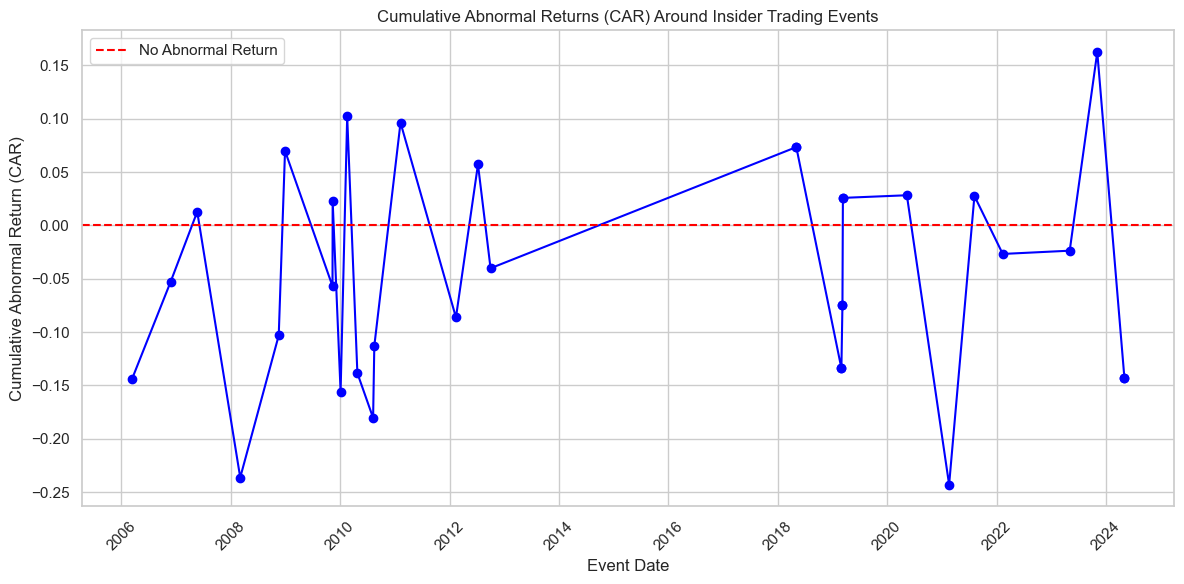

In [162]:
# 1. Plotting CAR for Each Insider Trading Event
plt.figure(figsize=(12, 6))
plt.plot(car_df['event_date'], car_df['CAR'], marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Cumulative Abnormal Returns (CAR) Around Insider Trading Events")
plt.xlabel("Event Date")
plt.ylabel("Cumulative Abnormal Return (CAR)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Average CAR Across All Insider Events with Confidence Intervals:**

Purpose: This bar plot shows the average CAR across all insider trading events, with a 95% confidence interval (CI) around the mean.

The bar represents the mean CAR across all insider events, and the error bars indicate the 95% CI. If the CI does not intersect the 0 line, it suggests a statistically significant average effect.

If the bar (mean CAR) is positive and does not intersect with 0, it implies a general tendency for the stock price to increase following insider trades.

If it’s negative and does not intersect with 0, it suggests a tendency for the stock price to decrease post-insider trading events.

Insights: This visualization summarizes the overall impact of insider trades on stock prices, indicating whether they lead to consistent upward or downward movements and if this impact is statistically significant.

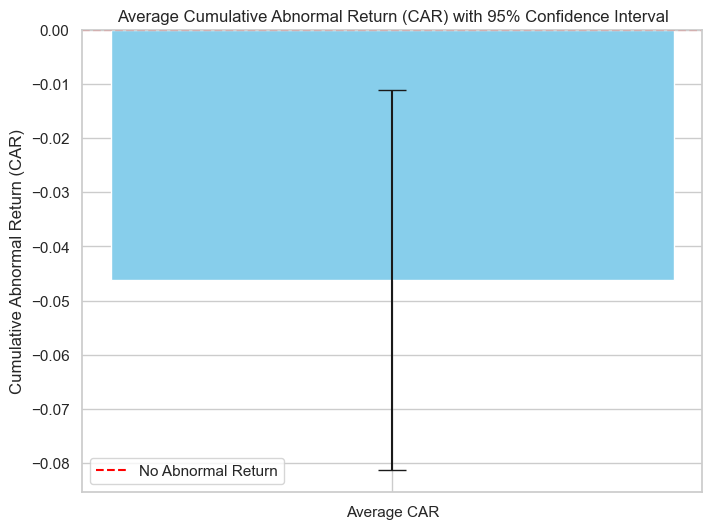

In [165]:
# 2. Average CAR Across All Insider Events with Confidence Intervals
mean_car = car_df['CAR'].mean()
car_sem = sem(car_df['CAR'])

plt.figure(figsize=(8, 6))
plt.bar(['Average CAR'], [mean_car], yerr=[1.96 * car_sem], capsize=10, color='skyblue')
plt.axhline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Average Cumulative Abnormal Return (CAR) with 95% Confidence Interval")
plt.ylabel("Cumulative Abnormal Return (CAR)")
plt.legend()
plt.show()

**Histogram of CAR Values Across Events:**

Purpose: This histogram visualizes the distribution of CAR values across all insider trading events, helping to identify the overall direction (positive or negative) and spread of market reactions.

A right-skewed distribution with more positive CAR values suggests that insider trades tend to generate positive abnormal returns, indicating favorable market sentiment.

A left-skewed distribution with more negative CAR values would imply that insider trades often coincide with negative abnormal returns.

If CAR values are centered around zero, this suggests minimal consistent market reaction to insider trades.

Insights: This histogram provides a quick visual summary of how insider trades affect stock prices on average. If the distribution is largely positive, it would align with the hypothesis that insider purchases are a bullish signal to the market.

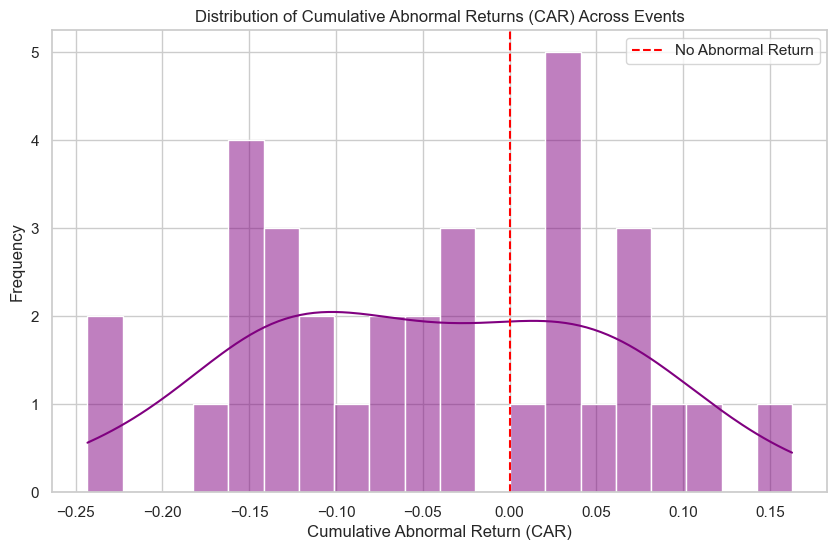

In [168]:
# 3. Histogram of CAR Values Across Events
plt.figure(figsize=(10, 6))
sns.histplot(car_df['CAR'], bins=20, color='purple', kde=True)
plt.axvline(0, color='red', linestyle='--', label="No Abnormal Return")
plt.title("Distribution of Cumulative Abnormal Returns (CAR) Across Events")
plt.xlabel("Cumulative Abnormal Return (CAR)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Statistical Test for CAR Significance:**

Purpose: This statistical test (t-test) checks if the average CAR is significantly different from zero across all events, providing a quantitative measure of significance.

A p-value less than 0.05 would indicate that the CARs are significantly different from zero, supporting the notion that insider trades have a significant impact on stock prices.

If the p-value is greater than 0.05, we do not have enough statistical evidence to conclude that insider trades consistently impact stock price movements.

Insights: This test provides quantitative validation for your findings. A significant result implies that the impact of insider trades is non-random and could be used for predicting market behavior in response to insider events.

In [171]:
# Step 4: Statistical Test for CAR Significance
# Run a t-test to check if CARs are significantly different from zero
t_stat, p_value = ttest_1samp(car_df['CAR'], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation of p-value:
# - If p-value < 0.05, CARs are significantly different from zero at a 5% level.

T-statistic: -2.58474166359063, P-value: 0.014510444380273838


**These visualizations, together, help identify both individual and aggregate trends, allowing you to determine the direction, consistency, and significance of market reactions to insider trading events.**

**Predictive Modeling of Post-Trade Price Movements:**

Description: Build a predictive model that uses insider trading details (e.g., role, trade size, timing) and other stock/macro data (e.g., historical prices, trading volumes) to forecast short-term price movements.

Insight: This helps assess the predictive power of insider trading events on CVS Health's stock, aligning with your abstract’s aim of enhancing forecasting accuracy.

Steps:
Use insider trading details, historical stock returns, trading volume, and relevant macroeconomic indicators as features.
Build a model (e.g., logistic regression, random forest) to predict the direction of stock movement (up/down) or the CAR magnitude after each trade.
Potential Visualization: Feature importance plot for model insights, or ROC curve for classification performance.

In [179]:
# Convert date columns to datetime and set as index, removing duplicates
insider_trades.iloc[:, 2] = pd.to_datetime(insider_trades.iloc[:, 2], errors='coerce')
stock_prices.iloc[:, 0] = pd.to_datetime(stock_prices.iloc[:, 0], errors='coerce')

# Remove duplicates in date columns to make the index unique
insider_trades = insider_trades.drop_duplicates(subset=insider_trades.columns[2])
stock_prices = stock_prices.drop_duplicates(subset=stock_prices.columns[0])

# Set the date columns as the index
insider_trades.set_index(insider_trades.columns[2], inplace=True)
stock_prices.set_index(stock_prices.columns[0], inplace=True)

# Concatenate along columns
data = pd.concat([insider_trades, stock_prices], axis=1, join='inner').fillna(0)

# Check the resulting columns
print(data.columns)

Index(['X', 'Filing_Date', 'Ticker', 'Insider Name', 'Title', 'Trade_Type',
       'Price', 'Qty', 'Owned', 'ΔOwn', 'Value', '1d', '1w', '1m', '6m',
       'Open', 'High', 'Low', 'Close', 'Volume', 'return'],
      dtype='object')


C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



In [181]:
# Calculate daily, weekly, and monthly percentage changes in price and volume
data['Daily_Price_Change'] = data['Close'].pct_change(periods=1)
data['Weekly_Price_Change'] = data['Close'].pct_change(periods=5)
data['Monthly_Price_Change'] = data['Close'].pct_change(periods=21)

data['Daily_Volume_Change'] = data['Volume'].pct_change(periods=1)
data['Weekly_Volume_Change'] = data['Volume'].pct_change(periods=5)
data['Monthly_Volume_Change'] = data['Volume'].pct_change(periods=21)

# Calculate moving averages for trend indication
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Volatility as a rolling standard deviation
data['Volatility'] = data['Close'].rolling(window=5).std()


**In finance, volatility is an indicator of the degree of variation in a stock's price over a specific period and is often used to assess risk. A higher standard deviation means more price fluctuation, indicating higher volatility, while a lower standard deviation suggests more stable prices.**

In [184]:
# Define target variable based on post-trade price change (up: 1, down: 0)
data['Price_Direction'] = (data['Daily_Price_Change'].shift(-1) > 0).astype(int)
data = data.dropna(subset=['Price_Direction'])


In [186]:
# Define feature columns
features = [
    'Daily_Price_Change', 'Weekly_Price_Change', 'Monthly_Price_Change',
    'Daily_Volume_Change', 'Weekly_Volume_Change', 'Monthly_Volume_Change',
    'MA_5', 'MA_20', 'MA_50', 'Volatility'
]

X = data[features]
y = data['Price_Direction']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [188]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [190]:
# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_score:.2f}")


              precision    recall  f1-score   support

           0       0.57      0.63      0.60        27
           1       0.66      0.59      0.62        32

    accuracy                           0.61        59
   macro avg       0.61      0.61      0.61        59
weighted avg       0.61      0.61      0.61        59

AUC-ROC Score: 0.68


**Feature Importance Plot: This plot sorts features by their importance, providing clarity on which features contribute the most to the model’s predictions. The use of color gradients and annotations enhances readability.**

C:\Users\Admin\AppData\Local\Temp\ipykernel_24712\1451773346.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




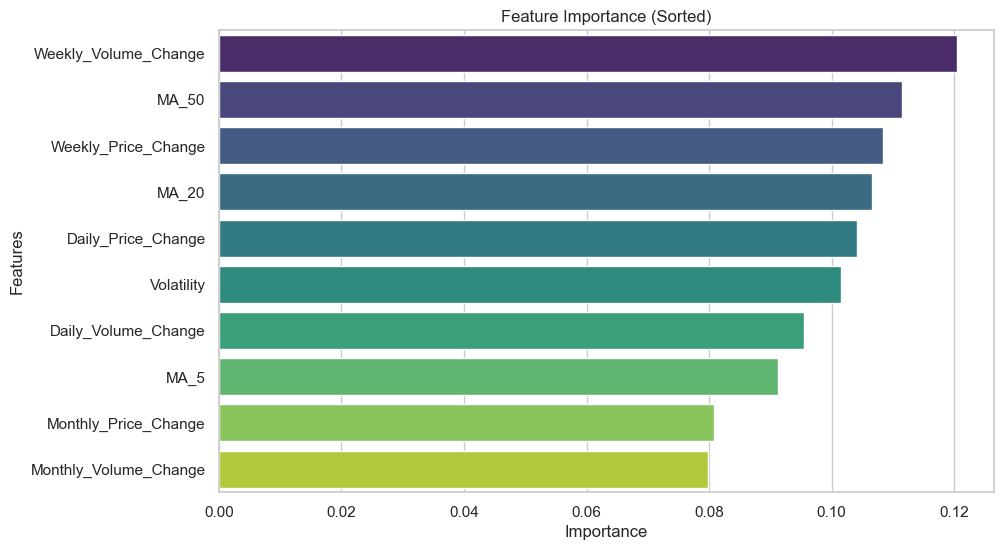

In [193]:

# Set style for better visuals
sns.set(style="whitegrid")

# Step 1: Enhanced Feature Importance Plot
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_features = [features[i] for i in indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_features, palette="viridis")
    plt.title("Feature Importance (Sorted)")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance(model, features)

**ROC Curve: A refined ROC curve with an AUC value clearly indicated, and a diagonal line for reference, gives insight into model performance across different thresholds.**

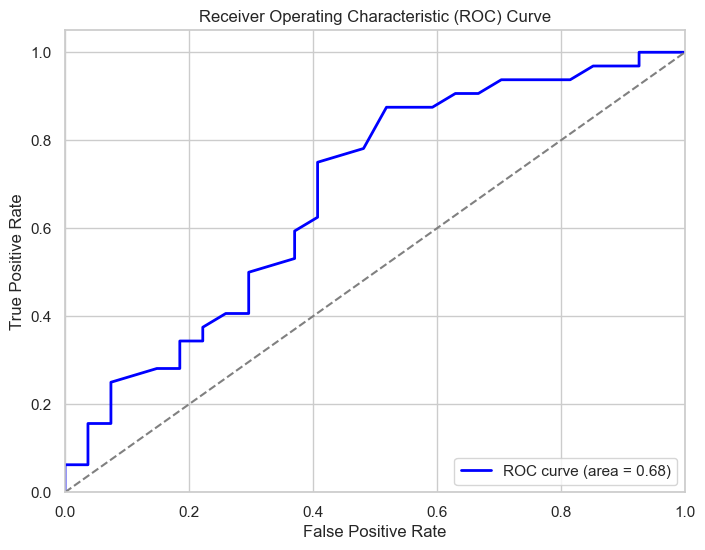

In [196]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
#Detailed ROC Curve Plot
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(y_test, y_pred_proba)

**Confusion Matrix: This heatmap provides a visual breakdown of true positive, true negative, false positive, and false negative predictions, offering immediate insight into model accuracy.**

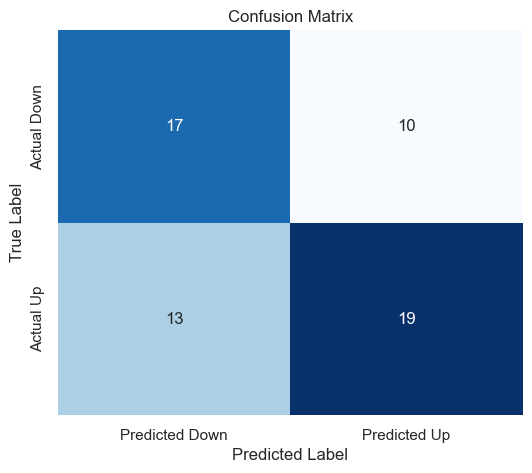

In [199]:
# Confusion Matrix with Heatmap
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Down', 'Predicted Up'], 
                yticklabels=['Actual Down', 'Actual Up'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


**Correlation Heatmap: This plot helps identify correlations between features, which can reveal redundancy in predictors and guide feature selection.**

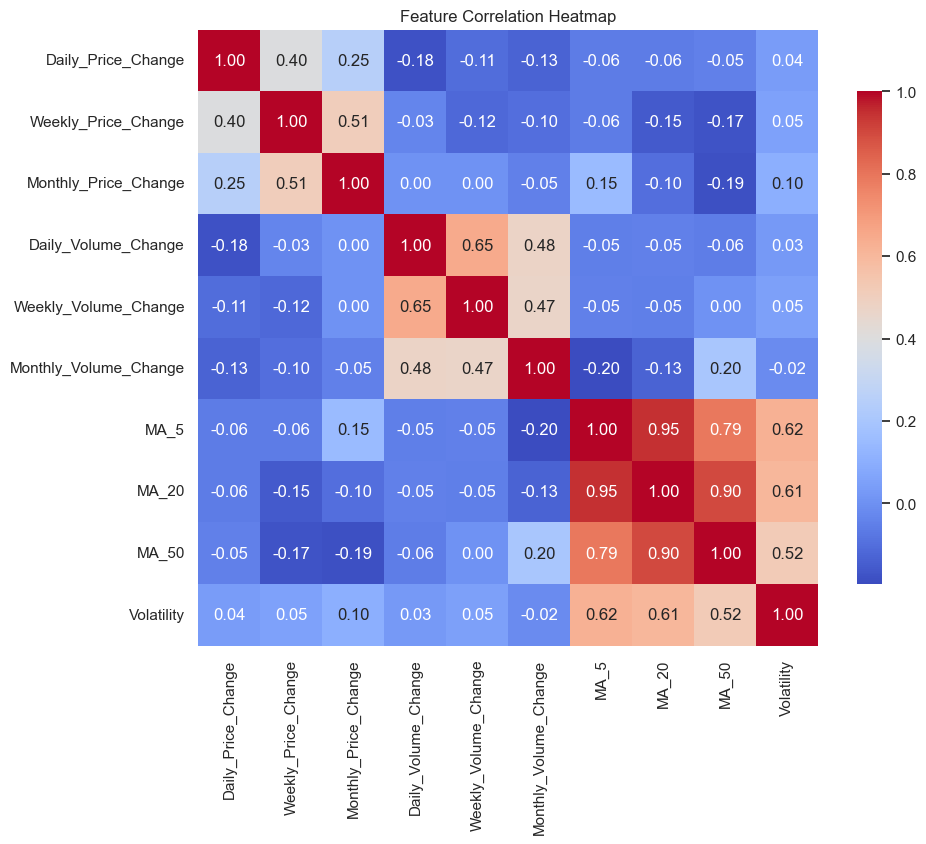

In [202]:
# Correlation Heatmap for Features
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': .8})
plt.title("Feature Correlation Heatmap")
plt.show()